<h1 style="text-align: center; color: #1E90FF;">
    NLP Project
</h1>


<div style="background-color: #F0F8FF; padding: 20px; border-radius: 10px;">

# <span style="color: red;">I. 👀 Business Understanding:</span>
- <span style="color: #1E90FF;"><strong>Amazon introduction</strong></span>
- <span style="color: #1E90FF;"><strong>Business objective</strong></span>
- <span style="color: #1E90FF;"><strong>Data science objective</strong></span>

# <span style="color: red;">II. 👀 Data Understanding:</span>
- <span style="color: #1E90FF;"><strong>Reading Data</strong></span>
- <span style="color: #1E90FF;"><strong>Exploratory Data Analysis (EDA)</strong></span>

# <span style="color: red;">III. Data Preprocessing:</span>
- <span style="color: #1E90FF;"><strong>Removing unuseful features</strong></span>
- <span style="color: #1E90FF;"><strong>Tokenizing and contractions</strong></span>
- <span style="color: #1E90FF;"><strong>Lowercasing</strong></span>
- <span style="color: #1E90FF;"><strong>Stop words and punctuation</strong></span>
- <span style="color: #1E90FF;"><strong>Rare words</strong></span>
- <span style="color: #1E90FF;"><strong>Lemmatization</strong></span>
- <span style="color: #1E90FF;"><strong>Removing numbers</strong></span>

# <span style="color: #32CD32;">Text Visualization:</span>
- <span style="color: #1E90FF;"><strong>Distribution of Most Frequently Used Words in Reviews</strong></span>
- <span style="color: #1E90FF;"><strong>Word Cloud</strong></span>

# <span style="color: #32CD32;">Feature Engineering:</span>
- <span style="color: #1E90FF;"><strong>Evaluating Semantic Consistency Using SBERT and Cosine Similarity</strong></span>
- <span style="color: #1E90FF;"><strong>Sentiment Analysis: Applying SIA and extracting sentimental feature</strong></span>

# <span style="color: #32CD32;">Feature Extraction:</span>
- <span style="color: #1E90FF;"><strong>TF-IDF</strong></span>
- <span style="color: #1E90FF;"><strong>Word2Vec:</strong> Cbow, Skip-gram</span>
- <span style="color: #1E90FF;"><strong>GloVe</strong></span>
- <span style="color: #1E90FF;"><strong>FastText</strong></span>

# <span style="color: #32CD32;">Comparison:</span>
- <span style="color: #1E90FF;"><strong>Cosine Similarity between TF-IDF, GloVe, FastText, and Word2Vec</strong></span>

# <span style="color: #32CD32;">Visualizing Text Similarity:</span>
- <span style="color: #1E90FF;"><strong>K-Means Clustering and PCA Analysis</strong></span>
# <span style="color: #32CD32;">Challenges faced during this project</span>

</div>


<h1 style="color: #FF6F61; text-align: center; font-weight: bold; background-color: #FFEBEE; padding: 20px; border-radius: 10px;">
   Business undrestanding
</h1>


<div style="background-color: #f5f5dc; padding: 10px; border-radius: 5px;">
Amazon is a global e-commerce platform where millions of products are reviewed. This project aims to analyze and model the sentiments expressed in Amazon customer reviews.
This analysis presents the challenge of efficiently processing large volumes of textual data and accurately interpreting the emotions expressed.
A successful implementation of sentiment analysis and modeling can significantly contribute to enhancing customer trust and loyalty, thereby fostering the company’s growth.

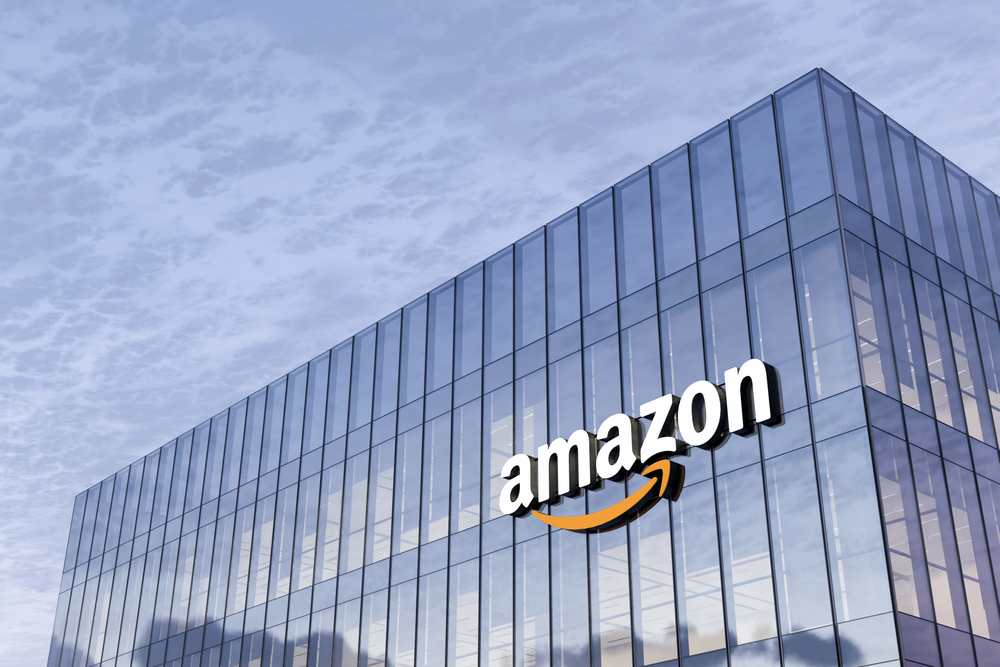

## 1.Business Objective:
**Our business objective is to enhance customer trust and loyalty, and improve the sales by understanding customer sentiments through their reviews on Amazon.**

## 2.Data science objective:
**Develop an nlp model to facilitate the sentiment analysis review**
    

<p style="font-family: Arial;font-weight: bold; font-size:1.75em;color:red; font-style:bold"><br>
Importing the Dataset


In [199]:
import pandas as pd 
import numpy as np 
import nltk
from warnings import filterwarnings
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from nltk.tokenize import TweetTokenizer   
from nltk.corpus import stopwords
import string
import re
import contractions
from collections import Counter
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
from scipy.linalg import triu
from collections import Counter
from wordcloud import WordCloud
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.preprocessing import LabelEncoder
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import spacy
from gensim.models import FastText
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [111]:
filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [112]:
df = pd.read_csv("C:/amazonsalesreviews/amazon_reviews.csv")


<h1 style="color: #FF6F61; text-align: center; font-weight: bold; background-color: #FFEBEE; padding: 20px; border-radius: 10px;">
  👀Data undrestanding

📌 Dataset Overview: This dataset contains Amazon product reviews, covering multiple categories and years.

📄 Attributes:

- ReviewerID: Unique identifier for each reviewer.
- ProductID (asin): Unique identifier for each product.
- ReviewerName: Name of the reviewer.
- ReviewText: Full text of the review.
- Overall: Rating given by the reviewer (1–5).
- Summary: A short summary of the review.
- UnixReviewTime: Timestamp of the review in UNIX format.
- ReviewTime: Review date in human-readable format.
- Helpful: Votes indicating the review's helpfulness [helpful_yes, total_vote].
- Day_diff: Number of days between the review date and a reference date.
- Helpful_yes: Count of votes indicating the review was helpful.
- Total_vote: Total number of votes the review received.


#### For NLP tasks like sentiment analysis, the ReviewText is typically enough, as it contains the main sentiment and feedback. However, features like Overall (ratings) , Helpful_yes and Summary can improve the model’s accuracy.

In [113]:
df.head()

reviewerID        asin  reviewerName helpful                                         reviewText  overall                                 summary  unixReviewTime  reviewTime  day_diff  \
0  A3SBTW3WS4IQSN  B007WTAJTO           NaN  [0, 0]                                         No issues.     4.00                              Four Stars      1406073600  2014-07-23       138   
1  A18K1ODH1I2MVB  B007WTAJTO          0mie  [0, 0]  Purchased this for my device, it worked as adv...     5.00                           MOAR SPACE!!!      1382659200  2013-10-25       409   
2  A2FII3I2MBMUIA  B007WTAJTO           1K3  [0, 0]  it works as expected. I should have sprung for...     4.00               nothing to really say....      1356220800  2012-12-23       715   
3   A3H99DFEG68SR  B007WTAJTO           1m2  [0, 0]  This think has worked out great.Had a diff. br...     5.00  Great buy at this price!!!  *** UPDATE      1384992000  2013-11-21       382   
4  A375ZM4U047O79  B007WTAJTO  2&amp;1/2Men  [0, 0]  Bought it with Retail Packaging, arrived legit...     5.00                        best deal around      1373673600  2013-07-13       513   

   helpful_yes  total_vote  
0            0           0  
1            0           0  
2            0           0  
3            0           0  
4            0           0

In [114]:
df.columns

Index(['reviewerID', 'asin', 'reviewerName', 'helpful', 'reviewText', 'overall', 'summary', 'unixReviewTime', 'reviewTime', 'day_diff', 'helpful_yes', 'total_vote'], dtype='object')

In [115]:
df.shape

(4915, 12)

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4915 entries, 0 to 4914
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviewerID      4915 non-null   object 
 1   asin            4915 non-null   object 
 2   reviewerName    4914 non-null   object 
 3   helpful         4915 non-null   object 
 4   reviewText      4914 non-null   object 
 5   overall         4915 non-null   float64
 6   summary         4915 non-null   object 
 7   unixReviewTime  4915 non-null   int64  
 8   reviewTime      4915 non-null   object 
 9   day_diff        4915 non-null   int64  
 10  helpful_yes     4915 non-null   int64  
 11  total_vote      4915 non-null   int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 460.9+ KB


In [117]:
df.describe()

overall  unixReviewTime  day_diff  helpful_yes  total_vote
count  4915.00         4915.00   4915.00      4915.00     4915.00
mean      4.59   1379465001.67    437.37         1.31        1.52
std       1.00     15818574.32    209.44        41.62       44.12
min       1.00   1339200000.00      1.00         0.00        0.00
25%       5.00   1365897600.00    281.00         0.00        0.00
50%       5.00   1381276800.00    431.00         0.00        0.00
75%       5.00   1392163200.00    601.00         0.00        0.00
max       5.00   1406073600.00   1064.00      1952.00     2020.00

<p style="
    font-family: Arial, sans-serif; 
    font-weight: bold; 
    font-size: 2.5em; 
    color: #FF6F61; /* Bright pink color */
    text-align: center; 
    margin: 20px 0; /* Vertical spacing */
">
    Exploratory Data Analysis (EDA)
</p>



## Histograms

### Distribution of Ratings (overall)

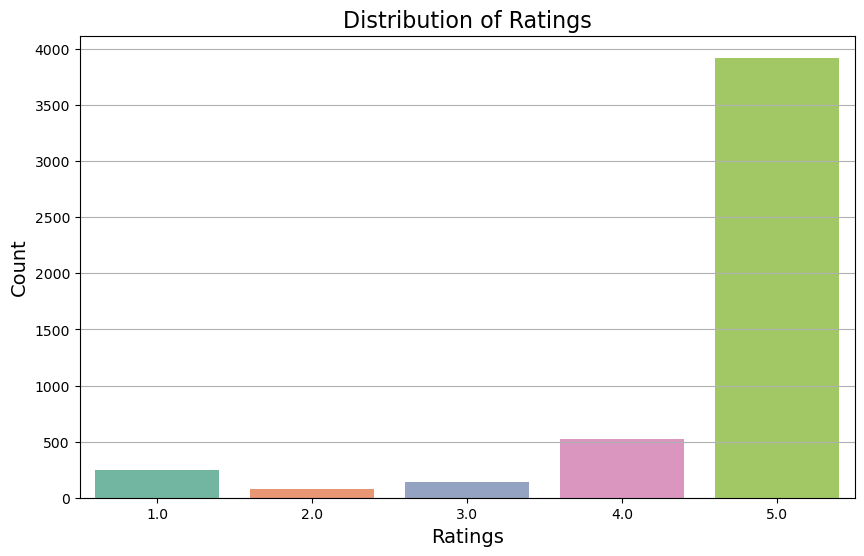

In [118]:
def plot_rating_distribution(df, column):
    """
    Plots the distribution of ratings in the specified column of a DataFrame.

    Parameters:
    df (pandas.DataFrame): The DataFrame containing the data.
    column (str): The name of the column for which to plot the distribution.
    """
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, data=df, palette='Set2')  
    plt.title('Distribution of Ratings', fontsize=16)
    plt.xlabel('Ratings', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(rotation=0)  
    plt.grid(axis='y') 
    plt.show()

plot_rating_distribution(df, 'overall')


The distribution is heavily skewed towards 5-star ratings, indicating that most of the reviews in the dataset are overwhelmingly positive. Over 4,000 reviews have a 5-star rating, while other ratings (1 to 4 stars) have significantly fewer entries.
 - There are very few reviews with 1-star or 2-star ratings. This could indicate either that the product(s) are generally well-received or that there may be some bias in how people rate (e.g., those who are satisfied are more likely to leave feedback).
 -  Products or services that are well-received often have more positive reviews (as is the case in your dataset). This natural imbalance can be a valid reflection of reality.So we are not going to balance the data

 **Understanding the skew in ratings helps set expectations for model performance.**

 Length of Reviews


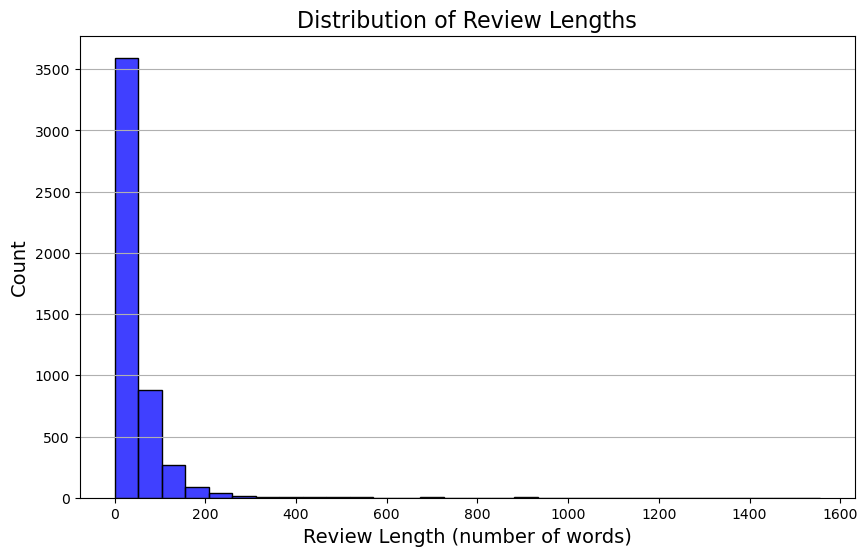

In [119]:
def plot_review_length_distribution(df, review_column, bins=30):
    """
    Plots the distribution of review lengths in the specified column of a DataFrame.
    
    Parameters:
    df (pandas.DataFrame): The DataFrame containing the data.
    review_column (str): The name of the column containing the review text.
    bins (int): Number of bins to use for the histogram. Default is 30.
    """
    df['review_length'] = df[review_column].apply(lambda x: len(str(x).split()))
    plt.figure(figsize=(10, 6))
    sns.histplot(df['review_length'], bins=bins, kde=False, color='blue') 
    plt.title('Distribution of Review Lengths', fontsize=16)
    plt.xlabel('Review Length (number of words)', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.grid(axis='y')  
    plt.show()

plot_review_length_distribution(df, 'reviewText')



- The distribution is right-skewed, meaning most reviews are short, with the count dropping off quickly as the review length increases.
-  Reviews longer than 200 words are much less frequent, and only a very small number of reviews exceed 500 words.
- You might want to explore the relationship between review length and sentiment score (i.e., do longer reviews tend to have more positive or negative sentiments?).
Additionally, investigate if there is any correlation between review length and the rating (1-5 stars), as detailed reviews might reflect more critical thinking, whether positive or negative.


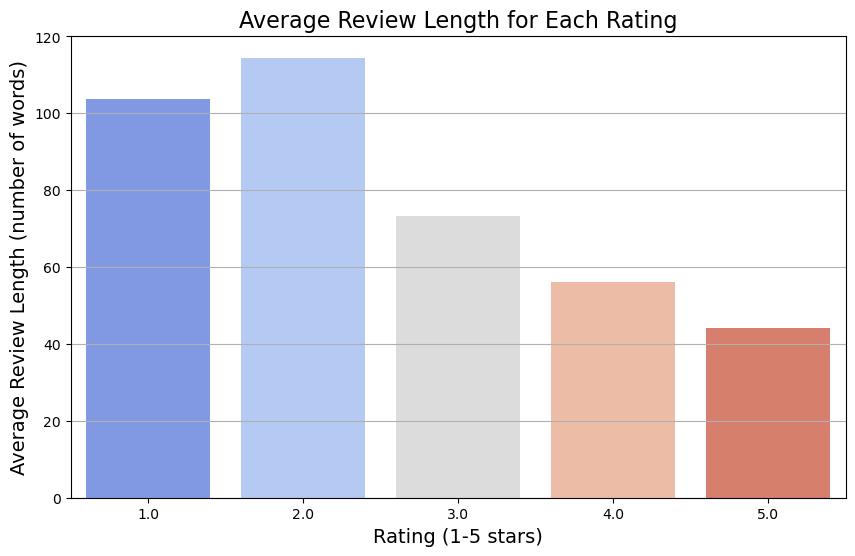

In [120]:
def plot_avg_review_length(df):
    """
    Function to plot the average review length for each rating.

    Parameters:
    df (DataFrame): Pandas DataFrame containing 'reviewText' and 'overall' columns.
    """
    df['review_length'] = df['reviewText'].apply(lambda x: len(str(x).split()))
    rating_review_length = df.groupby('overall')['review_length'].mean()
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x=rating_review_length.index, y=rating_review_length.values, palette='coolwarm')
    plt.title('Average Review Length for Each Rating', fontsize=16)
    plt.xlabel('Rating (1-5 stars)', fontsize=14)
    plt.ylabel('Average Review Length (number of words)', fontsize=14)
    plt.grid(axis='y')
    plt.show()
plot_avg_review_length(df)


- 1-star and 2-star reviews have higher average word counts, implying that when users are dissatisfied, they provide more detailed feedback.
- 3-star reviews have a moderate length, possibly indicating mixed opinions or more neutral feedback.
- 4-star and 5-star reviews are shorter, suggesting that satisfied users are generally more concise in their praise.
**Sentiment Analysis Weighting:**
- Review Length as a Feature: Since longer reviews often indicate dissatisfaction, you can use the review length as an additional feature in your sentiment analysis model. For instance, if a review is long, you might assign a higher probability that it's negative.

## Helpful Votes Analysis:

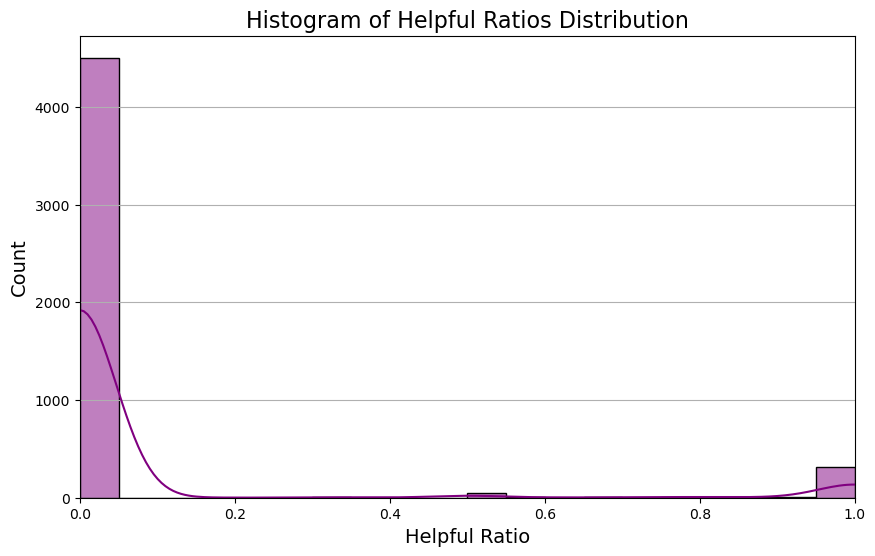

In [121]:
def plot_helpful_ratio_histogram(df):
    """
    Function to calculate the helpful ratio and plot its distribution using a histogram.

    Parameters:
    df (DataFrame): Pandas DataFrame containing 'helpful_yes' and 'total_vote' columns.
    """
    df['helpful_ratio'] = df['helpful_yes'] / df['total_vote'].replace(0, 1)

    plt.figure(figsize=(10, 6))
    sns.histplot(df['helpful_ratio'], bins=20, kde=True, color='purple')
    
    plt.title('Histogram of Helpful Ratios Distribution', fontsize=16)
    plt.xlabel('Helpful Ratio', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.grid(axis='y')
    plt.xlim(0, 1)
    plt.show()

plot_helpful_ratio_histogram(df)


**Reviews marked as "helpful" often contain clearer or more actionable sentiment. This can be valuable for building training data or weighting certain reviews more in models.**
- High Concentration at Zero:
The vast majority of reviews have a helpful ratio of 0.0, indicating that many reviews either received no helpful votes or very few compared to the total number of votes. This suggests that a large number of reviews may not have resonated with readers or were not deemed helpful.
-Given the high concentration of reviews with a helpful ratio of 0 and the potential for this feature to introduce noise 
Ultimately, it would be beneficial to evaluate the performance of the model both with and without this feature to make an informed decision.

## Relationship

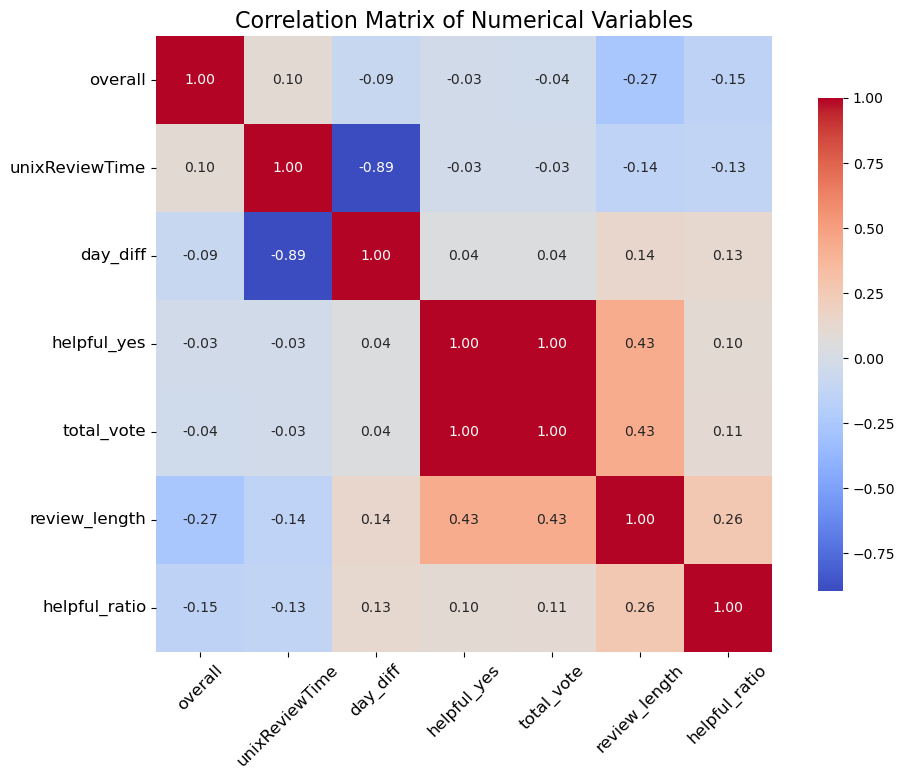

In [122]:
def plot_correlation_matrix(df):
    """
    Plots the correlation matrix for the DataFrame.

    Parameters:
    df (pandas.DataFrame): The DataFrame containing numerical data.
    """
    corr = df.corr()
    
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
    
    plt.title('Correlation Matrix of Numerical Variables', fontsize=16)
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(rotation=0, fontsize=12)
    plt.show()
numerical_df= df.select_dtypes(include=['number'])
plot_correlation_matrix(numerical_df)


# Interpretation of the Correlation Matrix

- **Strong Negative Correlation**: There's a strong negative correlation between `unixReviewTime` and `day_diff` (-0.89), meaning that older reviews (higher Unix timestamps) are associated with smaller day differences.
- **No Strong Correlation with `overall`**: The `overall` rating has weak correlations with other variables, indicating that it’s not significantly influenced by factors like review length, helpful votes, or total votes.
- **Perfect Correlation**: `helpful_yes` and `total_vote` are perfectly correlated (1.00), showing that the number of helpful votes is closely tied to the total number of votes.
- **Moderate Correlation**: `review_length` has a moderate positive correlation with `helpful_yes` and `total_vote` (0.43), suggesting longer reviews tend to get more votes and helpful responses.

## Conclusion
Overall, the matrix shows that most variables are weakly correlated with the `overall` rating, while factors like review length and helpful votes are more related to user interaction (helpfulness and total votes). The perfect correlation between `helpful_yes` and `total_vote` confirms that helpful reviews receive more votes.


**This is the core of sentiment analysis. Categorizing reviews into positive, neutral, and negative sentiment and comparing it to the "Overall" rating can refine the model.**

In [123]:
df['reviewText']


0                                              No issues.
1       Purchased this for my device, it worked as adv...
2       it works as expected. I should have sprung for...
3       This think has worked out great.Had a diff. br...
4       Bought it with Retail Packaging, arrived legit...
                              ...                        
4910    I bought this Sandisk 16GB Class 10 to use wit...
4911    Used this for extending the capabilities of my...
4912    Great card that is very fast and reliable. It ...
4913    Good amount of space for the stuff I want to d...
4914    I've heard bad things about this 64gb Micro SD...
Name: reviewText, Length: 4915, dtype: object

In [124]:
for review in df['reviewText']:
    print(review)


No issues.
Purchased this for my device, it worked as advertised. You can never have too much phone memory, since I download a lot of stuff this was a no brainer for me.
it works as expected. I should have sprung for the higher capacity.  I think its made a bit cheesier than the earlier versions; the paint looks not as clean as before
This think has worked out great.Had a diff. bran 64gb card and if went south after 3 months.This one has held up pretty well since I had my S3, now on my Note3.*** update 3/21/14I've had this for a few months and have had ZERO issue's since it was transferred from my S3 to my Note3 and into a note2. This card is reliable and solid!Cheers!
Bought it with Retail Packaging, arrived legit, in a orange envelope, english version not asian like the picture shows. arrived quickly, bought a 32 and 16 both retail packaging for my htc one sv and Lg Optimus, both cards in working order, probably best price you'll get for a nice sd card
It's mini storage.  It doesn't 

In [125]:
df['summary']

0                                   Four Stars
1                                MOAR SPACE!!!
2                    nothing to really say....
3       Great buy at this price!!!  *** UPDATE
4                             best deal around
                         ...                  
4910                  Do not waste your money.
4911                               Great item!
4912             Fast and reliable memory card
4913                         Great little card
4914                           So far so good.
Name: summary, Length: 4915, dtype: object

Time-Based Analysis


In [126]:
df.columns

Index(['reviewerID', 'asin', 'reviewerName', 'helpful', 'reviewText', 'overall', 'summary', 'unixReviewTime', 'reviewTime', 'day_diff', 'helpful_yes', 'total_vote', 'review_length', 'helpful_ratio'], dtype='object')

<h1 style="color: #FF6F61; text-align: center; font-weight: bold; background-color: #FFEBEE; padding: 20px; border-radius: 10px;">
  👀Data preprocessing

## 1- Removing unuseful features 

reviewerID , productid (à voir)

In [127]:
df.drop(columns=['reviewerName'],inplace=True)


In [128]:
df.drop(columns=['asin'],inplace=True)

In [129]:
df

reviewerID helpful                                         reviewText  overall                                 summary  unixReviewTime  reviewTime  day_diff  helpful_yes  total_vote  \
0     A3SBTW3WS4IQSN  [0, 0]                                         No issues.     4.00                              Four Stars      1406073600  2014-07-23       138            0           0   
1     A18K1ODH1I2MVB  [0, 0]  Purchased this for my device, it worked as adv...     5.00                           MOAR SPACE!!!      1382659200  2013-10-25       409            0           0   
2     A2FII3I2MBMUIA  [0, 0]  it works as expected. I should have sprung for...     4.00               nothing to really say....      1356220800  2012-12-23       715            0           0   
3      A3H99DFEG68SR  [0, 0]  This think has worked out great.Had a diff. br...     5.00  Great buy at this price!!!  *** UPDATE      1384992000  2013-11-21       382            0           0   
4     A375ZM4U047O79  [0, 0]  Bought it with Retail Packaging, arrived legit...     5.00                        best deal around      1373673600  2013-07-13       513            0           0   
...              ...     ...                                                ...      ...                                     ...             ...         ...       ...          ...         ...   
4910  A2LBMKXRM5H2W9  [0, 0]  I bought this Sandisk 16GB Class 10 to use wit...     1.00                Do not waste your money.      1374537600  2013-07-23       503            0           0   
4911   ALGDLRUI1ZPCS  [0, 0]  Used this for extending the capabilities of my...     5.00                             Great item!      1377129600  2013-08-22       473            0           0   
4912  A2MR1NI0ENW2AD  [0, 0]  Great card that is very fast and reliable. It ...     5.00           Fast and reliable memory card      1396224000  2014-03-31       252            0           0   
4913  A37E6P3DSO9QJD  [0, 0]  Good amount of space for the stuff I want to d...     5.00                       Great little card      1379289600  2013-09-16       448            0           0   
4914   A8KGFTFQ86IBR  [0, 0]  I've heard bad things about this 64gb Micro SD...     5.00                         So far so good.      1388620800  2014-02-01       310            0           0   

      review_length  helpful_ratio  
0                 2           0.00  
1                31           0.00  
2                31           0.00  
3                66           0.00  
4                52           0.00  
...             ...            ...  
4910             60           0.00  
4911             28           0.00  
4912             45           0.00  
4913             21           0.00  
4914             39           0.00  

[4915 rows x 12 columns]

## 2. Tokenizing and contractions

 Tokenization means breaking big pieces of text, like paragraphs or sentences, into smaller parts.

This helps to better understand patterns and trends in the text.


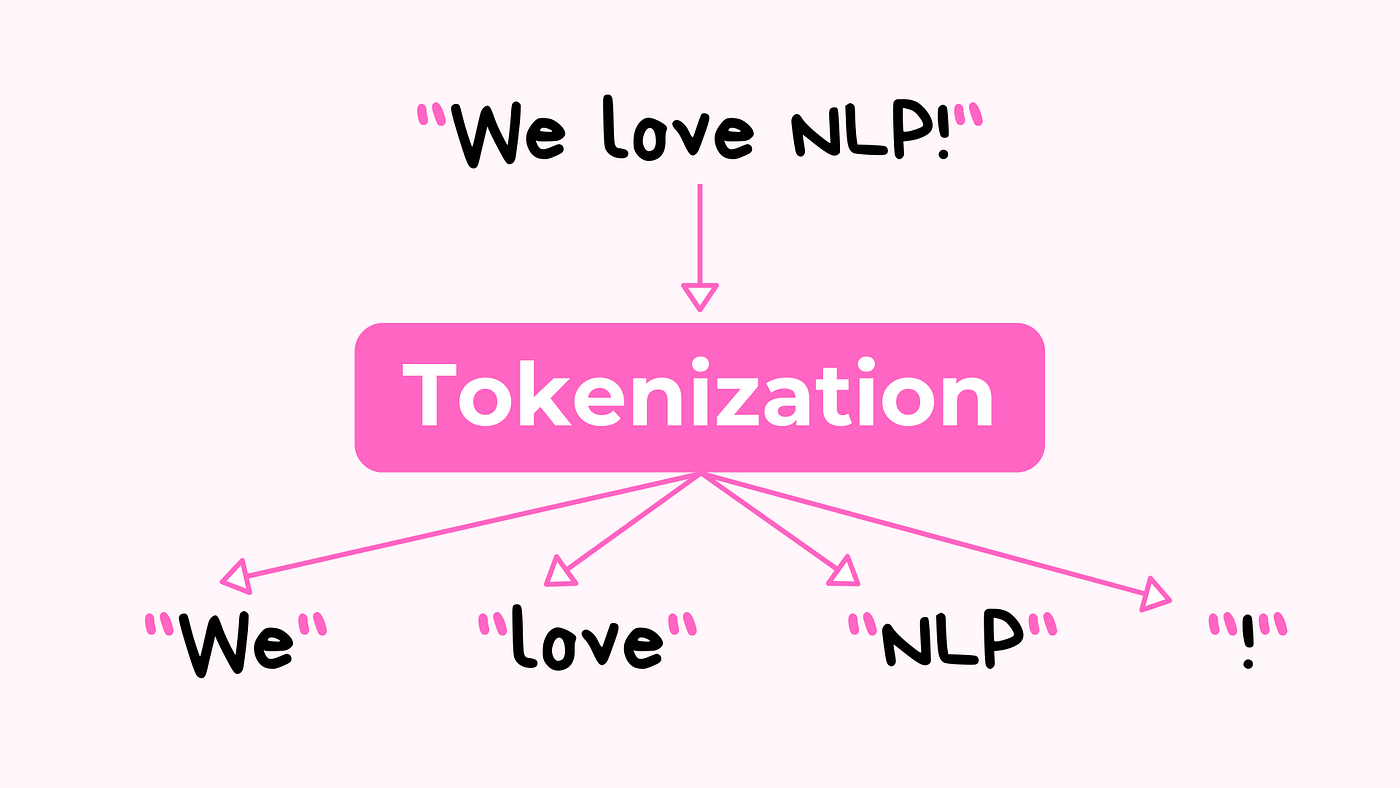

## tokenization for reviewText

**The review text contains:**
- Complete sentences and structured language.
- Uses standard punctuation and capitalization.
- Does not have elements typical to social media (like hashtags or mentions).
#### So we are going to apply word tokenize instead of tweetTokenizer

In [130]:
! pip install contractions


**The contractions library is used in the code to expand contractions into their full forms, enhancing text clarity and improving tokenization accuracy for natural language processing tasks.**

In [131]:
def tokenize_reviews(df, text_column, tokenized_column):
    """
    Tokenizes the text in the specified column of a DataFrame.

    Parameters:
    - df: pd.DataFrame - The DataFrame containing the reviews.
    - text_column: str - The name of the column to tokenize.
    - tokenized_column: str - The name of the column to store the tokenized results.

    Returns:
    - pd.DataFrame - The DataFrame with an additional column for tokenized reviews.
    """
    df[text_column] = df[text_column].astype(str)
    def custom_tokenize(text):
        text = contractions.fix(text)
        text = re.sub(r"[^\w\s]+", ' ', text)  
        text = re.sub(r'\s+', ' ', text)  
        return word_tokenize(text.strip())  

    df[tokenized_column] = df[text_column].apply(custom_tokenize)
    
    return df



In [132]:
df = tokenize_reviews(df, text_column='reviewText', tokenized_column='Tokenized_Review')
print(df[['reviewText', 'Tokenized_Review']])

                                             reviewText                                   Tokenized_Review
0                                            No issues.                                       [No, issues]
1     Purchased this for my device, it worked as adv...  [Purchased, this, for, my, device, it, worked,...
2     it works as expected. I should have sprung for...  [it, works, as, expected, I, should, have, spr...
3     This think has worked out great.Had a diff. br...  [This, think, has, worked, out, great, Had, a,...
4     Bought it with Retail Packaging, arrived legit...  [Bought, it, with, Retail, Packaging, arrived,...
...                                                 ...                                                ...
4910  I bought this Sandisk 16GB Class 10 to use wit...  [I, bought, this, Sandisk, 16GB, Class, 10, to...
4911  Used this for extending the capabilities of my...  [Used, this, for, extending, the, capabilities...
4912  Great card that is very fast an

In [133]:
def tokenize_review_texts(df, column_name):
    """
    Tokenizes the specified column in the given DataFrame using TweetTokenizer.

    Parameters:
    dataframe (pd.DataFrame): The DataFrame containing the text to be tokenized.
    column_name (str): The name of the column to tokenize.

    Returns:
    pd.DataFrame: A new DataFrame with an additional column for the tokenized text.
    """
    tokenizer = TweetTokenizer()
    df['Tokenizedtweet_Review'] = df[column_name].apply(tokenizer.tokenize)
    
    return df
tokenized_df = tokenize_review_texts(df, 'reviewText')
print(tokenized_df[['reviewText', 'Tokenizedtweet_Review']].head(10))


                                          reviewText                              Tokenizedtweet_Review
0                                         No issues.                                    [No, issues, .]
1  Purchased this for my device, it worked as adv...  [Purchased, this, for, my, device, ,, it, work...
2  it works as expected. I should have sprung for...  [it, works, as, expected, ., I, should, have, ...
3  This think has worked out great.Had a diff. br...  [This, think, has, worked, out, great.Had, a, ...
4  Bought it with Retail Packaging, arrived legit...  [Bought, it, with, Retail, Packaging, ,, arriv...
5  It's mini storage.  It doesn't do anything els...  [It's, mini, storage, ., It, doesn't, do, anyt...
6  I have it in my phone and it never skips a bea...  [I, have, it, in, my, phone, and, it, never, s...
7  It's hard to believe how affordable digital ha...  [It's, hard, to, believe, how, affordable, dig...
8  Works in a HTC Rezound.  Was running short of ...  [Works, in

#### Review Text Tokenization:

#### Uses a custom word_tokenize function for structured text (complete sentences). It first expands contractions (e.g., "can't" to "cannot") and removes punctuation.
#### Then, it splits the cleaned text into tokens (individual words or phrases), which helps prepare the text for analysis tasks like sentiment analysis or classification.

In [134]:
df.drop(columns=['Tokenizedtweet_Review'],inplace=True)

In [135]:
df

reviewerID helpful                                         reviewText  overall                                 summary  unixReviewTime  reviewTime  day_diff  helpful_yes  total_vote  \
0     A3SBTW3WS4IQSN  [0, 0]                                         No issues.     4.00                              Four Stars      1406073600  2014-07-23       138            0           0   
1     A18K1ODH1I2MVB  [0, 0]  Purchased this for my device, it worked as adv...     5.00                           MOAR SPACE!!!      1382659200  2013-10-25       409            0           0   
2     A2FII3I2MBMUIA  [0, 0]  it works as expected. I should have sprung for...     4.00               nothing to really say....      1356220800  2012-12-23       715            0           0   
3      A3H99DFEG68SR  [0, 0]  This think has worked out great.Had a diff. br...     5.00  Great buy at this price!!!  *** UPDATE      1384992000  2013-11-21       382            0           0   
4     A375ZM4U047O79  [0, 0]  Bought it with Retail Packaging, arrived legit...     5.00                        best deal around      1373673600  2013-07-13       513            0           0   
...              ...     ...                                                ...      ...                                     ...             ...         ...       ...          ...         ...   
4910  A2LBMKXRM5H2W9  [0, 0]  I bought this Sandisk 16GB Class 10 to use wit...     1.00                Do not waste your money.      1374537600  2013-07-23       503            0           0   
4911   ALGDLRUI1ZPCS  [0, 0]  Used this for extending the capabilities of my...     5.00                             Great item!      1377129600  2013-08-22       473            0           0   
4912  A2MR1NI0ENW2AD  [0, 0]  Great card that is very fast and reliable. It ...     5.00           Fast and reliable memory card      1396224000  2014-03-31       252            0           0   
4913  A37E6P3DSO9QJD  [0, 0]  Good amount of space for the stuff I want to d...     5.00                       Great little card      1379289600  2013-09-16       448            0           0   
4914   A8KGFTFQ86IBR  [0, 0]  I've heard bad things about this 64gb Micro SD...     5.00                         So far so good.      1388620800  2014-02-01       310            0           0   

      review_length  helpful_ratio                                   Tokenized_Review  
0                 2           0.00                                       [No, issues]  
1                31           0.00  [Purchased, this, for, my, device, it, worked,...  
2                31           0.00  [it, works, as, expected, I, should, have, spr...  
3                66           0.00  [This, think, has, worked, out, great, Had, a,...  
4                52           0.00  [Bought, it, with, Retail, Packaging, arrived,...  
...             ...            ...                                                ...  
4910             60           0.00  [I, bought, this, Sandisk, 16GB, Class, 10, to...  
4911             28           0.00  [Used, this, for, extending, the, capabilities...  
4912             45           0.00  [Great, card, that, is, very, fast, and, relia...  
4913             21           0.00  [Good, amount, of, space, for, the, stuff, I, ...  
4914             39           0.00  [I, have, heard, bad, things, about, this, 64g...  

[4915 rows x 13 columns]

## tokenization for summary

In [136]:
df = tokenize_reviews(df, text_column='summary', tokenized_column='Tokenized_Summary')
print(df[['summary','Tokenized_Summary']].head(10))

                                             summary                                  Tokenized_Summary
0                                         Four Stars                                      [Four, Stars]
1                                      MOAR SPACE!!!                                      [MOAR, SPACE]
2                          nothing to really say....                         [nothing, to, really, say]
3             Great buy at this price!!!  *** UPDATE              [Great, buy, at, this, price, UPDATE]
4                                   best deal around                               [best, deal, around]
5                        Not a lot to really be said                [Not, a, lot, to, really, be, said]
6                                         Works well                                      [Works, well]
7  32 GB for less than two sawbucks...what's not ...  [32, GB, for, less, than, two, sawbucks, what,...
8                                      Loads of room            

#### Summary Tokenization:

#### A similar process is applied to the 'summary' column. It cleans the text by fixing contractions and removing punctuation before splitting it into tokens.

#### => The resulting DataFrame includes new columns (Tokenized_Review and Tokenized_Summary), containing tokenized versions of both the review text and summaries, making them ready for further natural language processing tasks.

## Lowercasing Textreview and summary

In [137]:
df['Tokenized_Review']=df['Tokenized_Review'].apply(lambda x: [token.lower() for token in x])
df['Tokenized_Summary']=df['Tokenized_Summary'].apply(lambda x: [token.lower() for token in x])


In [138]:
df['Tokenized_Review']

0                                            [no, issues]
1       [purchased, this, for, my, device, it, worked,...
2       [it, works, as, expected, i, should, have, spr...
3       [this, think, has, worked, out, great, had, a,...
4       [bought, it, with, retail, packaging, arrived,...
                              ...                        
4910    [i, bought, this, sandisk, 16gb, class, 10, to...
4911    [used, this, for, extending, the, capabilities...
4912    [great, card, that, is, very, fast, and, relia...
4913    [good, amount, of, space, for, the, stuff, i, ...
4914    [i, have, heard, bad, things, about, this, 64g...
Name: Tokenized_Review, Length: 4915, dtype: object

In [139]:
df['Tokenized_Summary']

0                               [four, stars]
1                               [moar, space]
2                  [nothing, to, really, say]
3       [great, buy, at, this, price, update]
4                        [best, deal, around]
                        ...                  
4910            [do, not, waste, your, money]
4911                            [great, item]
4912      [fast, and, reliable, memory, card]
4913                    [great, little, card]
4914                      [so, far, so, good]
Name: Tokenized_Summary, Length: 4915, dtype: object

## 3.Stop words and punctuation 

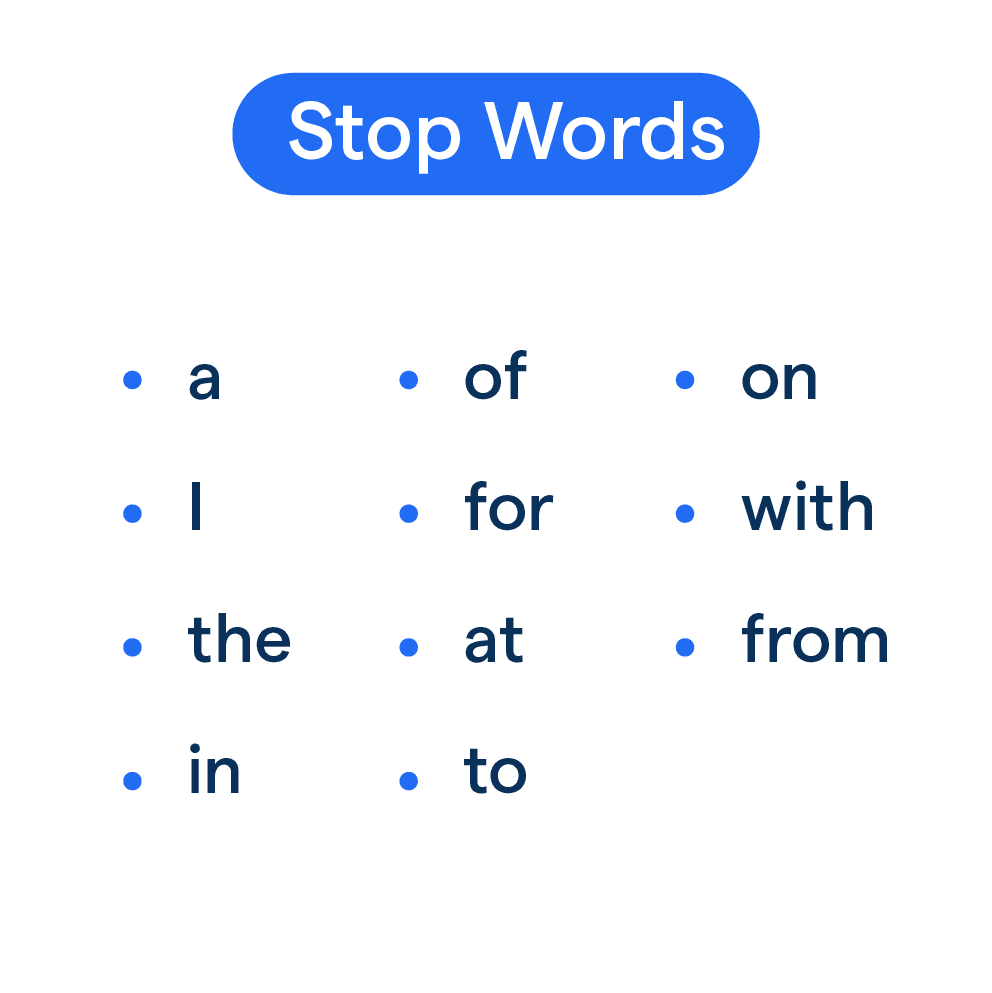

In data cleaning, removing stop words and punctuation is important to focus on meaningful content in the text:

  - Stop Words: Common words like "the," "and," "is," which do not add significant meaning to the analysis, are removed to reduce noise and improve model performance.

  - Punctuation: Characters like commas, periods, or question marks are removed because they don't contribute to the semantic understanding of the text but can interfere with tokenization or analysis.

This cleaning helps simplify the data and makes it easier for models to learn relevant patterns.

In [140]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#### Removing stop words from textreview

In [141]:
def remove_stopwords_punctuation(df, text_column):
    """
    Removes stopwords and punctuation from the specified text column in a DataFrame.

    Parameters:
    - df: pd.DataFrame - The DataFrame containing the reviews.
    - text_column: str - The name of the column from which to remove stopwords.
    """
    stop_words=stopwords.words('english')
    def clean_text(text):
        return [word for word in text if word.lower() not in stop_words and word not in string.punctuation]

    df[text_column] = df[text_column].apply(clean_text)
    return df


The function remove_stopwords_punctuation takes a DataFrame (df) and a specified text column (text_column) as input. It cleans the text by removing stopwords and punctuation:

  - Stopwords: Common words like "the" and "is" are filtered out using the stopwords from NLTK.
  - Punctuation: Symbols like commas, periods, etc., are removed using Python’s string.punctuation.
    
The clean_text function processes each text entry, filtering out stopwords and punctuation. The cleaned text is then reassigned to the same column in the DataFrame, and the modified DataFrame is returned. The final print statement shows the cleaned version of the Tokenized_Review column.

In [142]:
df = remove_stopwords_punctuation(df, text_column='Tokenized_Review')
print(df[['Tokenized_Review']])


                                       Tokenized_Review
0                                              [issues]
1     [purchased, device, worked, advertised, never,...
2     [works, expected, sprung, higher, capacity, th...
3     [think, worked, great, different, bran, 64gb, ...
4     [bought, retail, packaging, arrived, legit, or...
...                                                 ...
4910  [bought, sandisk, 16gb, class, 10, use, htc, i...
4911  [used, extending, capabilities, samsung, galax...
4912  [great, card, fast, reliable, comes, optional,...
4913  [good, amount, space, stuff, want, fits, gopro...
4914  [heard, bad, things, 64gb, micro, sd, card, cr...

[4915 rows x 1 columns]


In [143]:
for review in df['Tokenized_Review']:
    print(review)


['issues']
['purchased', 'device', 'worked', 'advertised', 'never', 'much', 'phone', 'memory', 'since', 'download', 'lot', 'stuff', 'brainer']
['works', 'expected', 'sprung', 'higher', 'capacity', 'think', 'made', 'bit', 'cheesier', 'earlier', 'versions', 'paint', 'looks', 'clean']
['think', 'worked', 'great', 'different', 'bran', '64gb', 'card', 'went', 'south', '3', 'months', 'one', 'held', 'pretty', 'well', 'since', 's3', 'note3', 'update', '3', '21', '14i', 'months', 'zero', 'issue', 'since', 'transferred', 's3', 'note3', 'note2', 'card', 'reliable', 'solid', 'cheers']
['bought', 'retail', 'packaging', 'arrived', 'legit', 'orange', 'envelope', 'english', 'version', 'asian', 'like', 'picture', 'shows', 'arrived', 'quickly', 'bought', '32', '16', 'retail', 'packaging', 'htc', 'one', 'sv', 'lg', 'optimus', 'cards', 'working', 'order', 'probably', 'best', 'price', 'get', 'nice', 'sd', 'card']
['mini', 'storage', 'anything', 'else', 'supposed', 'purchased', 'add', 'additional', 'storage

#### Removing stop words from summary

In [144]:
df = remove_stopwords_punctuation(df, text_column='Tokenized_Summary')

In [145]:
df['Tokenized_Summary']

0                        [four, stars]
1                        [moar, space]
2               [nothing, really, say]
3          [great, buy, price, update]
4                 [best, deal, around]
                     ...              
4910                    [waste, money]
4911                     [great, item]
4912    [fast, reliable, memory, card]
4913             [great, little, card]
4914                       [far, good]
Name: Tokenized_Summary, Length: 4915, dtype: object

##  4.Rarewords

**In this step , we Removed rare words that appear only once across all tokenized reviews to focus on more meaningful and frequent terms**

In [146]:

def remove_rare_words(df, tokenized_column):
    """
    Removes rare words (appearing only once) from a column of tokenized reviews.

    Parameters:
    - df (pd.DataFrame): DataFrame containing the tokenized reviews.
    - tokenized_column (str): The column name where tokenized reviews are stored (list of tokens).

    Returns:
    - pd.DataFrame: DataFrame with rare words removed from the tokenized reviews.
    """
    all_words = [word for review in df[tokenized_column] for word in review]
    
    word_freq = Counter(all_words)
    
    rare_words = {word for word, count in word_freq.items() if count == 1}
    
    df[tokenized_column] = df[tokenized_column].apply(lambda tokens: [word for word in tokens if word not in rare_words])
    
    return df



In [147]:
df =remove_rare_words(df, 'Tokenized_Review')
df =remove_rare_words(df, 'Tokenized_Summary')

## 5.  Lemmatization


<div style="background-color:#ADD8E6; padding: 10px;">
    <h3>Why Lemmatization and not Stemming?</h3>
    <p>Stemming is not preferred in our database because it can lead to non-words or roots that may not retain the original meaning. For instance, "running" might be reduced to "run," but "better" could become "better" or "bett," which can confuse the analysis. Stemming lacks the context of words, potentially misrepresenting sentiments in reviews, which is the opposite with Lemmatization. In contrast, lemmatization provides accurate base forms, ensuring semantic consistency, which is crucial for effective sentiment analysis in your dataset.</p>
</div>


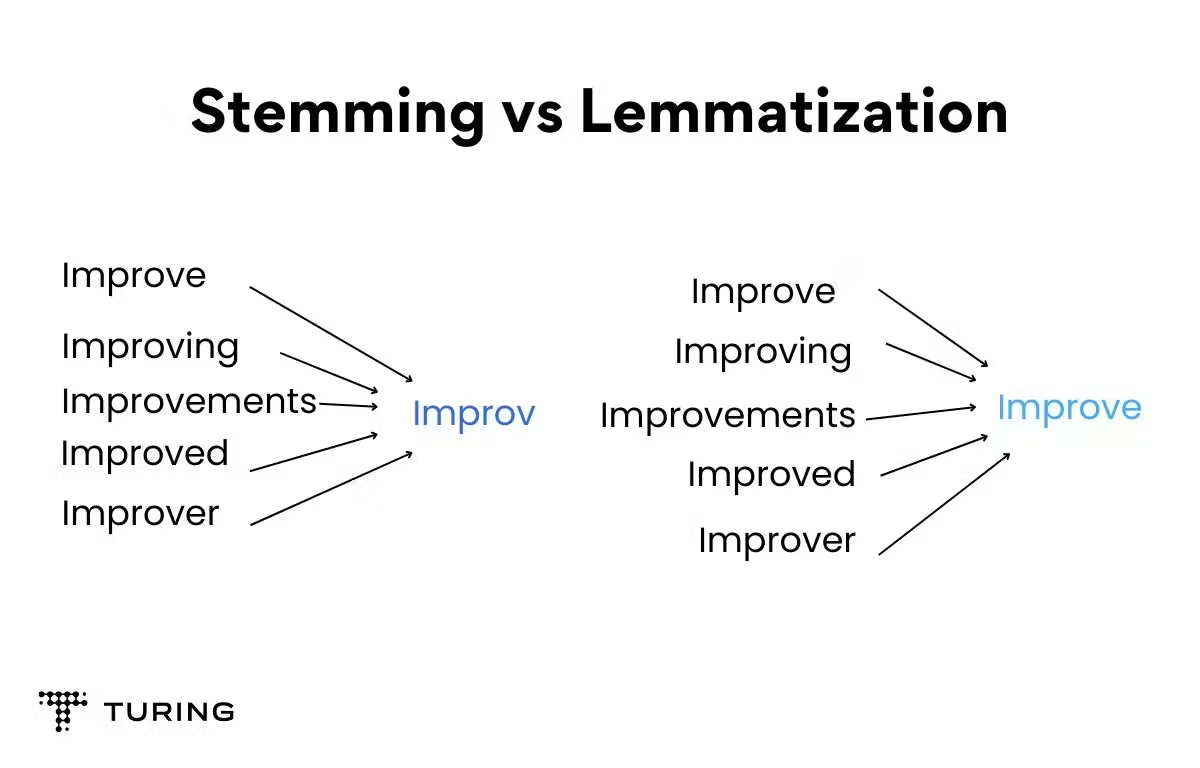

- In this step, we lemmatized each word in the comments of the reviewText column and summary column to obtain their root forms. Lemmatization reduces different inflected forms of words (like 'running' to 'run') to their base form. This provides a more consistent and meaningful data processing opportunity in our NLP analyses.



In [148]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [149]:
lemmatizer = WordNetLemmatizer()
def lemmatize_text(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text])



### Lemmatization of text review

In [150]:
df['Tokenized_Review'] = df['Tokenized_Review'].apply(lemmatize_text)


The code applies lemmatization to two columns, 'Tokenized_Review' and 'Tokenized_Summary', in a DataFrame containing customer reviews. 

The lemmatize_text function processes each entry by converting all words to their base form using the WordNetLemmatizer. 

  - Lemmatization: Words in the text columns are reduced to their base forms (e.g., "bought" becomes "buy").
  - DataFrame: The cleaned, lemmatized words replace the original tokenized versions in the respective columns ('Tokenized_Review', 'Tokenized_Summary').
  - Final Output: The DataFrame now shows the base form of words, improving consistency for further text analysis.

In [151]:
df

reviewerID helpful                                         reviewText  overall                                 summary  unixReviewTime  reviewTime  day_diff  helpful_yes  total_vote  \
0     A3SBTW3WS4IQSN  [0, 0]                                         No issues.     4.00                              Four Stars      1406073600  2014-07-23       138            0           0   
1     A18K1ODH1I2MVB  [0, 0]  Purchased this for my device, it worked as adv...     5.00                           MOAR SPACE!!!      1382659200  2013-10-25       409            0           0   
2     A2FII3I2MBMUIA  [0, 0]  it works as expected. I should have sprung for...     4.00               nothing to really say....      1356220800  2012-12-23       715            0           0   
3      A3H99DFEG68SR  [0, 0]  This think has worked out great.Had a diff. br...     5.00  Great buy at this price!!!  *** UPDATE      1384992000  2013-11-21       382            0           0   
4     A375ZM4U047O79  [0, 0]  Bought it with Retail Packaging, arrived legit...     5.00                        best deal around      1373673600  2013-07-13       513            0           0   
...              ...     ...                                                ...      ...                                     ...             ...         ...       ...          ...         ...   
4910  A2LBMKXRM5H2W9  [0, 0]  I bought this Sandisk 16GB Class 10 to use wit...     1.00                Do not waste your money.      1374537600  2013-07-23       503            0           0   
4911   ALGDLRUI1ZPCS  [0, 0]  Used this for extending the capabilities of my...     5.00                             Great item!      1377129600  2013-08-22       473            0           0   
4912  A2MR1NI0ENW2AD  [0, 0]  Great card that is very fast and reliable. It ...     5.00           Fast and reliable memory card      1396224000  2014-03-31       252            0           0   
4913  A37E6P3DSO9QJD  [0, 0]  Good amount of space for the stuff I want to d...     5.00                       Great little card      1379289600  2013-09-16       448            0           0   
4914   A8KGFTFQ86IBR  [0, 0]  I've heard bad things about this 64gb Micro SD...     5.00                         So far so good.      1388620800  2014-02-01       310            0           0   

      review_length  helpful_ratio                                   Tokenized_Review               Tokenized_Summary  
0                 2           0.00                                              issue                   [four, stars]  
1                31           0.00  purchased device worked advertised never much ...                         [space]  
2                31           0.00  work expected higher capacity think made bit e...          [nothing, really, say]  
3                66           0.00  think worked great different 64gb card went so...     [great, buy, price, update]  
4                52           0.00  bought retail packaging arrived legit envelope...            [best, deal, around]  
...             ...            ...                                                ...                             ...  
4910             60           0.00  bought sandisk 16gb class 10 use htc inspire 3...                  [waste, money]  
4911             28           0.00  used capability samsung galaxy note 10 greatly...                   [great, item]  
4912             45           0.00  great card fast reliable come optional adapter...  [fast, reliable, memory, card]  
4913             21           0.00         good amount space stuff want fit gopro say           [great, little, card]  
4914             39           0.00  heard bad thing 64gb micro sd card crapping we...                     [far, good]  

[4915 rows x 14 columns]

### Lemmatization of summary feature

In [152]:
df['Tokenized_Summary'] = df['Tokenized_Summary'].apply(lemmatize_text)


## 6. Removing numbers 

**In this step, we removed numerical characters from the comments in both the 'reviewText' and summary columns. By eliminating numbers from the text, we can focus on language processing and text analysis tasks. This approach allows us to concentrate exclusively on the textual content, resulting in cleaner and more meaningful data analysis.**

In [153]:
def remove_numerical_characters(df, column_name):
    """
    Remove numerical characters from the specified column in the DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame from which to remove numerical characters.
    column_name (str): The name of the column from which to remove numerical characters.

    Returns:
    pd.DataFrame: The DataFrame with numerical characters removed from the specified column.
    """
    if column_name in df.columns:
        df[column_name] = df[column_name].str.replace(r'\d', '', regex=True)
    else:
        raise ValueError(f"Column '{column_name}' does not exist in the DataFrame.")

    return df



In [154]:
df = remove_numerical_characters(df, 'Tokenized_Review')
df = remove_numerical_characters(df, 'Tokenized_Summary')


In [155]:
df

reviewerID helpful                                         reviewText  overall                                 summary  unixReviewTime  reviewTime  day_diff  helpful_yes  total_vote  \
0     A3SBTW3WS4IQSN  [0, 0]                                         No issues.     4.00                              Four Stars      1406073600  2014-07-23       138            0           0   
1     A18K1ODH1I2MVB  [0, 0]  Purchased this for my device, it worked as adv...     5.00                           MOAR SPACE!!!      1382659200  2013-10-25       409            0           0   
2     A2FII3I2MBMUIA  [0, 0]  it works as expected. I should have sprung for...     4.00               nothing to really say....      1356220800  2012-12-23       715            0           0   
3      A3H99DFEG68SR  [0, 0]  This think has worked out great.Had a diff. br...     5.00  Great buy at this price!!!  *** UPDATE      1384992000  2013-11-21       382            0           0   
4     A375ZM4U047O79  [0, 0]  Bought it with Retail Packaging, arrived legit...     5.00                        best deal around      1373673600  2013-07-13       513            0           0   
...              ...     ...                                                ...      ...                                     ...             ...         ...       ...          ...         ...   
4910  A2LBMKXRM5H2W9  [0, 0]  I bought this Sandisk 16GB Class 10 to use wit...     1.00                Do not waste your money.      1374537600  2013-07-23       503            0           0   
4911   ALGDLRUI1ZPCS  [0, 0]  Used this for extending the capabilities of my...     5.00                             Great item!      1377129600  2013-08-22       473            0           0   
4912  A2MR1NI0ENW2AD  [0, 0]  Great card that is very fast and reliable. It ...     5.00           Fast and reliable memory card      1396224000  2014-03-31       252            0           0   
4913  A37E6P3DSO9QJD  [0, 0]  Good amount of space for the stuff I want to d...     5.00                       Great little card      1379289600  2013-09-16       448            0           0   
4914   A8KGFTFQ86IBR  [0, 0]  I've heard bad things about this 64gb Micro SD...     5.00                         So far so good.      1388620800  2014-02-01       310            0           0   

      review_length  helpful_ratio                                   Tokenized_Review          Tokenized_Summary  
0                 2           0.00                                              issue                  four star  
1                31           0.00  purchased device worked advertised never much ...                      space  
2                31           0.00  work expected higher capacity think made bit e...         nothing really say  
3                66           0.00  think worked great different gb card went sout...     great buy price update  
4                52           0.00  bought retail packaging arrived legit envelope...           best deal around  
...             ...            ...                                                ...                        ...  
4910             60           0.00  bought sandisk gb class  use htc inspire  mont...                waste money  
4911             28           0.00  used capability samsung galaxy note  greatly e...                 great item  
4912             45           0.00  great card fast reliable come optional adapter...  fast reliable memory card  
4913             21           0.00         good amount space stuff want fit gopro say          great little card  
4914             39           0.00  heard bad thing gb micro sd card crapping week...                   far good  

[4915 rows x 14 columns]

<p style="font-family: Arial;font-weight: bold; font-size:1.75em;color:red; font-style:bold"><br>
 Text visualization 

**In this step, we computed the term frequencies (TF) of all the words present in the 'reviewText' column. For each comment, we first split the text into individual words, then counted how often each word appeared in that specific comment, and finally summed up these counts across all comments. The results were then organized into a DataFrame with two columns: 'words' (the unique words) and 'tf' (their respective frequencies). We sorted the DataFrame in descending order based on the 'tf' values, highlighting the most commonly used words. This process helps us identify and analyze the most prominent terms in the dataset for further exploration or visualization.**

In [156]:
def compute_term_frequency(df, column_name):
    """
    Computes term frequencies (TF) for words 

    Parameters:
        df: Input dataframe that contains the text.
        column_name (str): The name of the column to analyze for term frequencies.

    Returns:
        DataFrame: a dataframe with two columns:
                    - 'words': Unique words from the specified column.
                    - 'tf': Corresponding term frequencies for each word, sorted by descending order.
    """
    
    word_counter= Counter()
    
    for review in df[column_name]:
        word_counter.update(review.split())
    
    tf_data= pd.DataFrame(word_counter.items(), columns=['words', 'tf'])
    tf_sorted = tf_data.sort_values(by='tf', ascending=False).reset_index(drop=True)
    return tf_sorted



In [157]:
tf_sorted = compute_term_frequency(df, 'Tokenized_Review')
tf_sorted

words    tf
0            card  5656
1            work  2081
2           phone  1977
3              gb  1762
4           great  1481
...           ...   ...
3549       slider     2
3550       visual     2
3551          cup     2
3552  association     2
3553       chkdsk     2

[3554 rows x 2 columns]

- The analysis reveals that terms like "card," "work," and "phone" are the most frequently mentioned in the reviews, indicating a focus on technology-related products and suggesting overall positive sentiments among users.
- The frequent mention of positive terms like "great" indicates a strong overall positive sentiment among users regarding their experiences with the products or services.

### 1. Distribution of Most Frequently Used Words in Reviews

<div style="background-color: #f5f5dc; padding: 10px; border-radius: 5px;">
The pie chart emphasizes quantitative analysis (exact frequencies and proportions),

In [158]:
def plot_top_n_words_pie_chart(tf_sorted, top_n=5):
    """
    Plots a pie chart of the top N words based on frequencies.
    Parameters:
        tf_sorted (DataFrame): data containing words and their term frequencies sorted by descending order.
        top_n (int): the number of top words to include in the pie chart (default value is 5).
    
    Returns:
        None: displays a pie chart of the top N words' distribution.
    """
    top_n = min(top_n, len(tf_sorted))
    tf_sorted.head(top_n).plot(kind='pie', y='tf', labels=tf_sorted.head(top_n)['words'], autopct='%1.1f%%', figsize=(8, 8))
    plt.title(f'Top {top_n} Words Distribution')
    plt.ylabel('') 
    plt.show()



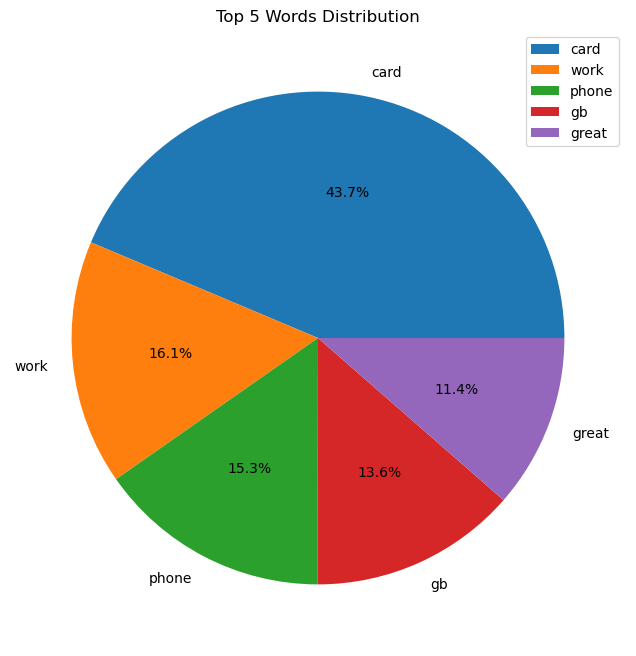

In [159]:
plot_top_n_words_pie_chart(tf_sorted, top_n=5)

- This visualization is important because it provides a clear and intuitive representation of the distribution of the most frequently used words, allowing for quick insights into the dominant themes and sentiments in the dataset.

- we applied the same thing for the summary feature 

In [160]:
tf_sorted_summary = compute_term_frequency(df, 'Tokenized_Summary')
tf_sorted_summary

words    tf
0     great  1139
1      work   846
2      card   701
3      good   433
4    memory   362
..      ...   ...
715    feel     2
716  thanks     2
717  dollar     2
718      rd     2
719    murr     2

[720 rows x 2 columns]

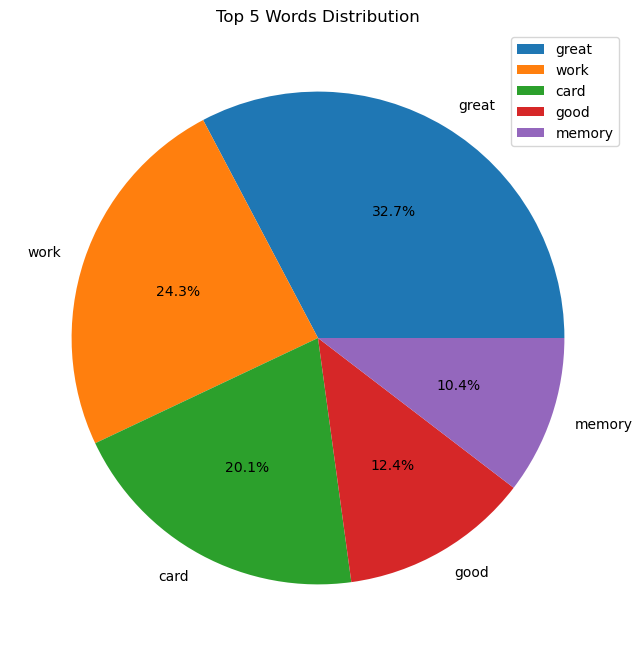

In [161]:
plot_top_n_words_pie_chart(tf_sorted_summary, top_n=5)

### 2. Word Cloud

<div style="background-color: #f5f5dc; padding: 10px; border-radius: 5px;">
- the word cloud offers a qualitative perspective on the overall vocabulary landscape and themes present in the text.

<div style="background-color:#FFB6C1; padding: 10px;">
    <p>A word cloud is a visual representation of text data, where the size of each word reflects its frequency in a set of reviews.</p>
    <p>In review analysis, it quickly highlights common themes, sentiments, and topics discussed by users.</p>
    <p>Larger words indicate more frequent mentions, helping identify key attributes of a product, guiding improvements, and enhancing engagement in reports.</p>
    <p>For instance, if words like "great" and "card" are prominent, as it shows in our word cloud, it suggests that customers frequently praise those features.</p>
</div>


In [162]:
def plot_word_cloud(tf_sorted):
    """
    Plots a word cloud from the term frequency .
    
    Parameters:
        tf_sorted: containing words and their term frequencies sorted by descending order.
    
    Returns:
        None: show a word cloud of the terms based on their frequencies.
    """
    words_freq= dict(zip(tf_sorted['words'], tf_sorted['tf']))
    wordcloud = WordCloud(width=900, height=500, background_color='skyblue').generate_from_frequencies(words_freq)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off') 
    plt.title('Word Cloud of Most Frequently words used')
    plt.show()


<h3>Word Cloud for Review Feature</h3>


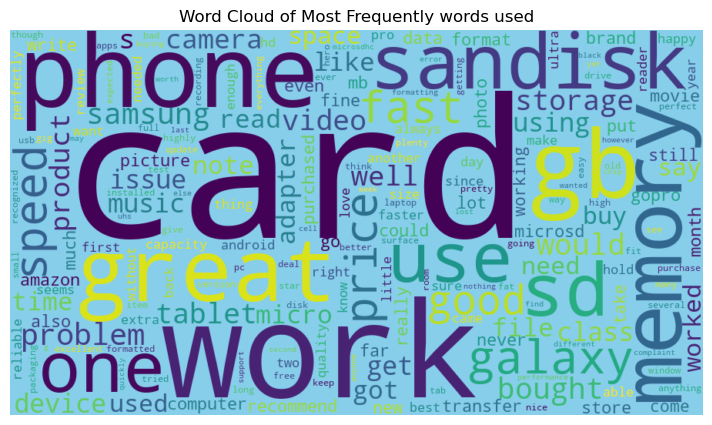

In [163]:
plot_word_cloud(tf_sorted)

<h3> word cloud for summary feature</h3>

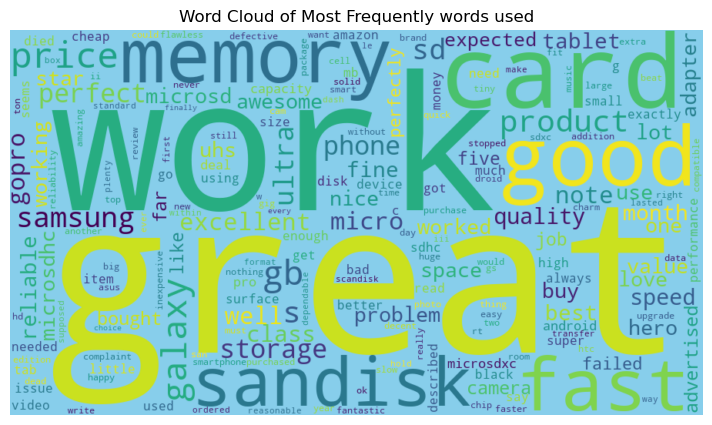

In [164]:
plot_word_cloud(tf_sorted_summary)

 - The similarity scores range from as low as 0.01 to as high as 0.74. This indicates a varying degree of similarity between the summaries and their respective reviews.
 - Summary 4 and Review 4 have a high similarity score of 0.33.
 - Summary 10 and Review 10 have an even higher score of 0.52.
 - Summary 13 has a very high score of 0.74 with Review 13, suggesting that the summary provides a very good reflection of the review.
 - Some pairs, like Summary 29 with a score of 0.01 or Summary 1 with a score of 0.18, indicate that the summary does not effectively capture the essence of the review.
 

<div style="background-color: lightblue; padding: 10px; border-radius: 5px;">
  <strong>Since not all summaries accurately reflect their corresponding reviews, we should experiment with our modeling by evaluating both options: 
 using only the reviews or incorporating both the summaries and reviews. This approach will allow us to determine which combination yields the best results, as including both features could enrich our analysis or potentially introduce redundancy. Therefore, testing both scenarios is essential for informed decision-making.</strong>
</div>


<p style="font-family: Arial;font-weight: bold; font-size:1.75em;color:red; font-style:bold"><br>
 Feature engineering 

## 1. Evaluating the Semantic Consistency Between Summary and Review Texts using SBERT (Sentence-BERT) AND COSINUS SIMILARITY 

<div style="background-color:#FFB6C1; padding: 10px;">
Understanding the similarity between the summary and the review is crucial because it helps us determine whether the summary accurately captures the key points and sentiments expressed in the review. This assessment can guide us in deciding whether the summary can effectively replace the review in our analysis or if both should be used together for a richer understanding of the content.

In [165]:
def compute_summary_review_similarity(df):
    """
    Computes the cosine similarity between each review and its corresponding summary 

    Parameters:
        df:contains two columns:
                        - 'Tokenized_Summary': The Summary to compare
                        - 'Tokenized_Review': The review to compare

    Returns:
        DataFrame: dataframe that contains the similarity score between each summary and its corresponding review.
    """
    model = SentenceTransformer('all-MiniLM-L6-v2')
    summary_embeddings = model.encode(df['Tokenized_Summary'].tolist())
    review_embeddings = model.encode(df['Tokenized_Review'].tolist())
    similarity_scores = cosine_similarity(summary_embeddings, review_embeddings)

    similarity_results = pd.DataFrame({
        'Summary': df['Tokenized_Summary'],
        'Review': df['Tokenized_Review'],
        'Similarity Score': similarity_scores.diagonal() 
    })

    return similarity_results




In [166]:
similarity_df = compute_summary_review_similarity(df)
print(similarity_df.head(50))


                           Summary                                             Review  Similarity Score
0                        four star                                              issue              0.18
1                            space  purchased device worked advertised never much ...              0.03
2               nothing really say  work expected higher capacity think made bit e...              0.04
3           great buy price update  think worked great different gb card went sout...              0.33
4                 best deal around  bought retail packaging arrived legit envelope...              0.26
5                  lot really said  mini storage anything else supposed purchased ...              0.06
6                        work well  phone never skip beat file transfer speedy cor...              0.11
7                   gb le two like  hard believe affordable digital become  gb dev...              0.29
8                        load room  work htc rezound running sho

## 2. Sentiment analysis

<div style="background-color:#FFB6C1; padding: 10px;">
In this step, we will analyze the feelings expressed in our text data to see if they are mostly positive, negative, or neutral. By turning these feelings into numbers, we can understand and study the sentiments in a clearer and more objective way.
So , we are going to use the SentimentIntensityAnalyzer (SIA) </div>


<h3>- SIA is built on a pre-trained model, making it easy to use without requiring additional training or data preparation.
    
    
-  It provides a compound score that ranges from -1 (most negative) to +1 (most positive), along with individual scores for positive, negative, and neutral sentiments.
    
    
- The analysis is fast and efficient, making it suitable for processing large volumes of text data quickly.> </h3>

In [167]:
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [168]:
sia = SentimentIntensityAnalyzer()


- we are going to try this model on a phrase to see how it works 

In [169]:
sia.polarity_scores("The product works so good i really liked it it's more than amazing")


{'neg': 0.0, 'neu': 0.446, 'pos': 0.554, 'compound': 0.9037}

<div style="background-color: lightblue; padding: 10px; border-radius: 5px;">
The compound score summarizes the overall sentiment of a text:

- -1 indicates a very negative sentiment,
- 0 indicates a neutral sentiment,
- +1 indicates a very positive sentiment.
</div>


In [170]:
sia.polarity_scores("the product is not bad but it's not so good")


{'neg': 0.289, 'neu': 0.573, 'pos': 0.138, 'compound': -0.4798}

Now we will calculates the polarity scores for each review in the Tokenized_Review column of the DataFrame df using the SentimentIntensityAnalyzer.

It creates a new column called polarity_score_review, which stores the compound sentiment score (ranging from -1 to +1) for each review.

In [171]:
df["Tokenized_Review"].apply(lambda x: sia.polarity_scores(x)["compound"])



0      0.00
1      0.00
2      0.40
3      0.92
4      0.86
       ... 
4910   0.08
4911   0.18
4912   0.85
4913   0.69
4914   0.05
Name: Tokenized_Review, Length: 4915, dtype: float64

After calculating th score for each review 
a new column is created and called polarity_score_review, which stores the compound sentiment score (ranging from -1 to +1) for each review.

In [172]:
df["polarity_score_review"] = df["Tokenized_Review"].apply(lambda x: sia.polarity_scores(x)["compound"])
df.head(10)

reviewerID helpful                                         reviewText  overall                                            summary  unixReviewTime  reviewTime  day_diff  helpful_yes  \
0  A3SBTW3WS4IQSN  [0, 0]                                         No issues.     4.00                                         Four Stars      1406073600  2014-07-23       138            0   
1  A18K1ODH1I2MVB  [0, 0]  Purchased this for my device, it worked as adv...     5.00                                      MOAR SPACE!!!      1382659200  2013-10-25       409            0   
2  A2FII3I2MBMUIA  [0, 0]  it works as expected. I should have sprung for...     4.00                          nothing to really say....      1356220800  2012-12-23       715            0   
3   A3H99DFEG68SR  [0, 0]  This think has worked out great.Had a diff. br...     5.00             Great buy at this price!!!  *** UPDATE      1384992000  2013-11-21       382            0   
4  A375ZM4U047O79  [0, 0]  Bought it with Retail Packaging, arrived legit...     5.00                                   best deal around      1373673600  2013-07-13       513            0   
5  A2IDCSC6NVONIZ  [0, 0]  It's mini storage.  It doesn't do anything els...     5.00                        Not a lot to really be said      1367193600  2013-04-29       588            0   
6  A26YHXZD5UFPVQ  [0, 0]  I have it in my phone and it never skips a bea...     5.00                                         Works well      1382140800  2013-10-19       415            0   
7  A3CW0ZLUO5X2B1  [0, 0]  It's hard to believe how affordable digital ha...     5.00  32 GB for less than two sawbucks...what's not ...      1404950400  2014-10-07        62            0   
8  A2CYJO155QP33S  [1, 1]  Works in a HTC Rezound.  Was running short of ...     5.00                                      Loads of room      1395619200  2014-03-24       259            1   
9  A2S7XG3ZC4VGOQ  [0, 0]  in my galaxy s4, super fast card, and am total...     5.00                                        works great      1381449600  2013-11-10       393            0   

   total_vote  review_length  helpful_ratio                                   Tokenized_Review       Tokenized_Summary  polarity_score_review  
0           0              2           0.00                                              issue               four star                   0.00  
1           0             31           0.00  purchased device worked advertised never much ...                   space                   0.00  
2           0             31           0.00  work expected higher capacity think made bit e...      nothing really say                   0.40  
3           0             66           0.00  think worked great different gb card went sout...  great buy price update                   0.92  
4           0             52           0.00  bought retail packaging arrived legit envelope...        best deal around                   0.86  
5           0             51           0.00  mini storage anything else supposed purchased ...         lot really said                   0.00  
6           0             75           0.00  phone never skip beat file transfer speedy cor...               work well                   0.87  
7           0             58           0.00  hard believe affordable digital become  gb dev...          gb le two like                   0.74  
8           1             26           1.00  work htc rezound running short space gb sandis...               load room                   0.00  
9           0             23           0.00  galaxy s super fast card totally happy happy s...              work great                   0.92

In [173]:
df["polarity_score_summary"] = df["Tokenized_Summary"].apply(lambda x: sia.polarity_scores(x)["compound"])
df.head(10)

reviewerID helpful                                         reviewText  overall                                            summary  unixReviewTime  reviewTime  day_diff  helpful_yes  \
0  A3SBTW3WS4IQSN  [0, 0]                                         No issues.     4.00                                         Four Stars      1406073600  2014-07-23       138            0   
1  A18K1ODH1I2MVB  [0, 0]  Purchased this for my device, it worked as adv...     5.00                                      MOAR SPACE!!!      1382659200  2013-10-25       409            0   
2  A2FII3I2MBMUIA  [0, 0]  it works as expected. I should have sprung for...     4.00                          nothing to really say....      1356220800  2012-12-23       715            0   
3   A3H99DFEG68SR  [0, 0]  This think has worked out great.Had a diff. br...     5.00             Great buy at this price!!!  *** UPDATE      1384992000  2013-11-21       382            0   
4  A375ZM4U047O79  [0, 0]  Bought it with Retail Packaging, arrived legit...     5.00                                   best deal around      1373673600  2013-07-13       513            0   
5  A2IDCSC6NVONIZ  [0, 0]  It's mini storage.  It doesn't do anything els...     5.00                        Not a lot to really be said      1367193600  2013-04-29       588            0   
6  A26YHXZD5UFPVQ  [0, 0]  I have it in my phone and it never skips a bea...     5.00                                         Works well      1382140800  2013-10-19       415            0   
7  A3CW0ZLUO5X2B1  [0, 0]  It's hard to believe how affordable digital ha...     5.00  32 GB for less than two sawbucks...what's not ...      1404950400  2014-10-07        62            0   
8  A2CYJO155QP33S  [1, 1]  Works in a HTC Rezound.  Was running short of ...     5.00                                      Loads of room      1395619200  2014-03-24       259            1   
9  A2S7XG3ZC4VGOQ  [0, 0]  in my galaxy s4, super fast card, and am total...     5.00                                        works great      1381449600  2013-11-10       393            0   

   total_vote  review_length  helpful_ratio                                   Tokenized_Review       Tokenized_Summary  polarity_score_review  polarity_score_summary  
0           0              2           0.00                                              issue               four star                   0.00                    0.00  
1           0             31           0.00  purchased device worked advertised never much ...                   space                   0.00                    0.00  
2           0             31           0.00  work expected higher capacity think made bit e...      nothing really say                   0.40                    0.00  
3           0             66           0.00  think worked great different gb card went sout...  great buy price update                   0.92                    0.62  
4           0             52           0.00  bought retail packaging arrived legit envelope...        best deal around                   0.86                    0.64  
5           0             51           0.00  mini storage anything else supposed purchased ...         lot really said                   0.00                    0.00  
6           0             75           0.00  phone never skip beat file transfer speedy cor...               work well                   0.87                    0.27  
7           0             58           0.00  hard believe affordable digital become  gb dev...          gb le two like                   0.74                    0.36  
8           1             26           1.00  work htc rezound running short space gb sandis...               load room                   0.00                    0.00  
9           0             23           0.00  galaxy s super fast card totally happy happy s...              work great                   0.92                    0.62

In [174]:
def compute_sentiment_labels(df, text_column, sentiment_label, encode_labels=True):
    """
    Assigns sentiment labels ('pos', 'neg', 'neu') based on the compound sentiment score 
    and then encodes these labels into numerical values if encode_labels is True.
    
    Parameters:
        df (pd.DataFrame): The input containing the text data.
        text_column (str): The name of the column that contains the text to analyze for sentiment analysis.
        sentiment_column (str): The name of the new column where the sentiment labels will be added.
        encode_labels (bool): If True, the sentiment labels ('pos', 'neg', 'neu') will be encoded into numerical values.
    
    Returns:
        pd.DataFrame: DataFrame with an additional column for sentiment labels encoded into numbers.
    """
    def get_sentiment_label(text):
        compound_score = sia.polarity_scores(text)["compound"]
        if compound_score > 0:
            return "pos"
        elif compound_score < 0:
            return "neg"
        else:
            return "neu"
    
    df[sentiment_label] = df[text_column].apply(get_sentiment_label)

    if encode_labels:
        label_mapping = {'neg': 0, 'pos': 1, 'neu': 2}
        df[sentiment_label] = df[sentiment_label].map(label_mapping)
    
    return df



<div style="background-color: lightblue; padding: 10px; border-radius: 5px;">
    The compute_sentiment_labels function analyzes the sentiment of text data in a DataFrame. </br>
    It assigns labels : positive ("pos"), negative ("neg"), or neutral ("neu")—based on the compound sentiment score derived from the text. </br>
    If specified, it also converts these labels into numerical values (0 for negative, 1 for positive, and 2 for neutral).
</div>

In [175]:
df = compute_sentiment_labels(df, text_column='Tokenized_Review', sentiment_label='sentiment_label_review', encode_labels=True)
df

reviewerID helpful                                         reviewText  overall                                 summary  unixReviewTime  reviewTime  day_diff  helpful_yes  total_vote  \
0     A3SBTW3WS4IQSN  [0, 0]                                         No issues.     4.00                              Four Stars      1406073600  2014-07-23       138            0           0   
1     A18K1ODH1I2MVB  [0, 0]  Purchased this for my device, it worked as adv...     5.00                           MOAR SPACE!!!      1382659200  2013-10-25       409            0           0   
2     A2FII3I2MBMUIA  [0, 0]  it works as expected. I should have sprung for...     4.00               nothing to really say....      1356220800  2012-12-23       715            0           0   
3      A3H99DFEG68SR  [0, 0]  This think has worked out great.Had a diff. br...     5.00  Great buy at this price!!!  *** UPDATE      1384992000  2013-11-21       382            0           0   
4     A375ZM4U047O79  [0, 0]  Bought it with Retail Packaging, arrived legit...     5.00                        best deal around      1373673600  2013-07-13       513            0           0   
...              ...     ...                                                ...      ...                                     ...             ...         ...       ...          ...         ...   
4910  A2LBMKXRM5H2W9  [0, 0]  I bought this Sandisk 16GB Class 10 to use wit...     1.00                Do not waste your money.      1374537600  2013-07-23       503            0           0   
4911   ALGDLRUI1ZPCS  [0, 0]  Used this for extending the capabilities of my...     5.00                             Great item!      1377129600  2013-08-22       473            0           0   
4912  A2MR1NI0ENW2AD  [0, 0]  Great card that is very fast and reliable. It ...     5.00           Fast and reliable memory card      1396224000  2014-03-31       252            0           0   
4913  A37E6P3DSO9QJD  [0, 0]  Good amount of space for the stuff I want to d...     5.00                       Great little card      1379289600  2013-09-16       448            0           0   
4914   A8KGFTFQ86IBR  [0, 0]  I've heard bad things about this 64gb Micro SD...     5.00                         So far so good.      1388620800  2014-02-01       310            0           0   

      review_length  helpful_ratio                                   Tokenized_Review          Tokenized_Summary  polarity_score_review  polarity_score_summary  sentiment_label_review  
0                 2           0.00                                              issue                  four star                   0.00                    0.00                       2  
1                31           0.00  purchased device worked advertised never much ...                      space                   0.00                    0.00                       2  
2                31           0.00  work expected higher capacity think made bit e...         nothing really say                   0.40                    0.00                       1  
3                66           0.00  think worked great different gb card went sout...     great buy price update                   0.92                    0.62                       1  
4                52           0.00  bought retail packaging arrived legit envelope...           best deal around                   0.86                    0.64                       1  
...             ...            ...                                                ...                        ...                    ...                     ...                     ...  
4910             60           0.00  bought sandisk gb class  use htc inspire  mont...                waste money                   0.08                   -0.42                       1  
4911             28           0.00  used capability samsung galaxy note  greatly e...                 great item                   0.18                    0.62                      

In [176]:
df = compute_sentiment_labels(df, text_column='Tokenized_Summary', sentiment_label='sentiment_label_summary', encode_labels=True)
df

reviewerID helpful                                         reviewText  overall                                 summary  unixReviewTime  reviewTime  day_diff  helpful_yes  total_vote  \
0     A3SBTW3WS4IQSN  [0, 0]                                         No issues.     4.00                              Four Stars      1406073600  2014-07-23       138            0           0   
1     A18K1ODH1I2MVB  [0, 0]  Purchased this for my device, it worked as adv...     5.00                           MOAR SPACE!!!      1382659200  2013-10-25       409            0           0   
2     A2FII3I2MBMUIA  [0, 0]  it works as expected. I should have sprung for...     4.00               nothing to really say....      1356220800  2012-12-23       715            0           0   
3      A3H99DFEG68SR  [0, 0]  This think has worked out great.Had a diff. br...     5.00  Great buy at this price!!!  *** UPDATE      1384992000  2013-11-21       382            0           0   
4     A375ZM4U047O79  [0, 0]  Bought it with Retail Packaging, arrived legit...     5.00                        best deal around      1373673600  2013-07-13       513            0           0   
...              ...     ...                                                ...      ...                                     ...             ...         ...       ...          ...         ...   
4910  A2LBMKXRM5H2W9  [0, 0]  I bought this Sandisk 16GB Class 10 to use wit...     1.00                Do not waste your money.      1374537600  2013-07-23       503            0           0   
4911   ALGDLRUI1ZPCS  [0, 0]  Used this for extending the capabilities of my...     5.00                             Great item!      1377129600  2013-08-22       473            0           0   
4912  A2MR1NI0ENW2AD  [0, 0]  Great card that is very fast and reliable. It ...     5.00           Fast and reliable memory card      1396224000  2014-03-31       252            0           0   
4913  A37E6P3DSO9QJD  [0, 0]  Good amount of space for the stuff I want to d...     5.00                       Great little card      1379289600  2013-09-16       448            0           0   
4914   A8KGFTFQ86IBR  [0, 0]  I've heard bad things about this 64gb Micro SD...     5.00                         So far so good.      1388620800  2014-02-01       310            0           0   

      review_length  helpful_ratio                                   Tokenized_Review          Tokenized_Summary  polarity_score_review  polarity_score_summary  sentiment_label_review  \
0                 2           0.00                                              issue                  four star                   0.00                    0.00                       2   
1                31           0.00  purchased device worked advertised never much ...                      space                   0.00                    0.00                       2   
2                31           0.00  work expected higher capacity think made bit e...         nothing really say                   0.40                    0.00                       1   
3                66           0.00  think worked great different gb card went sout...     great buy price update                   0.92                    0.62                       1   
4                52           0.00  bought retail packaging arrived legit envelope...           best deal around                   0.86                    0.64                       1   
...             ...            ...                                                ...                        ...                    ...                     ...                     ...   
4910             60           0.00  bought sandisk gb class  use htc inspire  mont...                waste money                   0.08                   -0.42                       1   
4911             28           0.00  used capability samsung galaxy note  greatly e...                 great item                   0.18                    0.62              

<p style="font-family: Arial;font-weight: bold; font-size:1.75em;color:red; font-style:bold"><br>
Feature extraction


Feature extraction is the process of transforming raw text into a structured format that can be used by machine learning models.


## 1.TF-IDF

<div style="background-color:#FFB6C1; padding: 10px;">
    TF-IDF (Term Frequency-Inverse Document Frequency) is a numerical statistic used to evaluate the importance of a word in a document relative to a collection of documents (corpus).</br> 
    It is calculated by multiplying two components:</br> 
      - Term Frequency (TF): Measures how frequently a term appears in a document. It's calculated as the ratio of the number of times a term appears in a document to the total number of terms in that document.</br> 
      - Inverse Document Frequency (IDF): Measures how important a term is across the entire corpus. It is calculated as the logarithm of the total number of documents divided by the number of documents containing the term. This helps reduce the weight of common words and increases the weight of rare terms.</br> 
    The result is a score that reflects how relevant a term is to a specific document while considering its rarity across the entire dataset, making it useful for tasks like text mining and information retrieval.</br> 

</div>

In [182]:
def apply_tfidf_on_column(df, column_name):
    """
    Applies TF-IDF vectorization on a specified column of a dataframe.
    
    Parameters:
        df (DataFrame): Input dataframe containing cleaned text data.
        column_name (str): The name of the column to apply TF-IDF on.
    
    Returns:
        tfidf_matrix (numpy array): TF-IDF matrix for the specified column.
    """
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_matrix = tfidf_vectorizer.fit_transform(df[column_name]).toarray()
    print(tfidf_matrix)



In [183]:
tfidf_review = apply_tfidf_on_column(df,'Tokenized_Review')
tfidf_review


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [54]:
tfidf_summary= apply_tfidf_on_column(df,'Tokenized_Summary')
tfidf_summary


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


As we can see, applying TF-IDF has resulted in too many zeros, which creates a sparse representation that can lead to overfitting.

#### The application of TF-IDF on the Tokenized_Summary column has produced a sparse matrix filled with zeros, indicating that many terms are not present in the summaries. This sparsity can lead to overfitting in models and fails to capture the semantic relationships between words. Therefore, we will switch to using Word2Vec for a more meaningful representation of the text.

## 2. Word2VEC 

<div style="background-color:#FFB6C1; padding: 10px;">
    <p>Word2Vec is a widely-used technique for generating word embeddings using a neural network to capture semantic relationships between words.</p>
    <p>It has two primary architectures:</p>
    <ul>
        <li>Continuous Bag of Words (CBOW): Predicts a target word from its surrounding context words, suitable for smaller datasets.</li>
        <li>Skip-gram: Predicts context words from a target word, effective for larger datasets and capturing rare words.</li>
    </ul>
    <p>Training Process: Word2Vec learns embeddings through iterative training on a large text corpus, adjusting word vector representations to enhance word prediction accuracy.</p>
    <p>Semantic Nature: Word2Vec embeddings are valued for their ability to encode semantic relationships, reflecting how words are used in context.</p>
</div>


- Word2Vec is a powerful technique that uses neural networks to learn vector representations of words from large text corpora, enabling the capture of semantic relationships and similarities in language.

In [55]:
def apply_word2vec(df, tokenized_text, model_type='cbow', vector_size=100, window=5, min_count=1):
    """
    Applies Word2Vec with the specified architecture on a specified column of a dataframe.

    Parameters:
        df (DataFrame): Input dataframe containing tokenized text.
        tokenized_text (str): The name of the column to apply Word2Vec on.
        model_type (str): Type of Word2Vec model to use - 'cbow' or 'skipgram'.
        vector_size (int): Dimensionality of the word vectors.
        window (int): Maximum distance between the current and predicted word.
        min_count (int): Ignores all words with total frequency lower than this.

    Returns:
        word2vec_matrix (numpy array): Averaged Word2Vec vectors for the sentences in the specified column.
    """
    
    tokenized_texts = df[tokenized_text].values.tolist()
    
    sg = 1 if model_type == 'skipgram' else 0  
    
    w2v_model = Word2Vec(tokenized_texts, vector_size=vector_size, window=window, min_count=min_count, sg=sg)
    
    word2vec_matrix = np.array([
        np.mean([w2v_model.wv[word] for word in text if word in w2v_model.wv] or [np.zeros(vector_size)], axis=0)
        for text in tokenized_texts
    ])
    
    print(f"Word2Vec ({'CBOW' if sg == 0 else 'Skipgram'}) Vectors:\n{word2vec_matrix}")
    return word2vec_matrix



#### CBOW with text review feature

<div style="background-color:#FFB6C1; padding: 10px; border-radius: 5px;">
    <h3>CBOW Word Embedding Process</h3>
    <ul>
        <li><strong>Contextual Input:</strong> Uses a fixed-size window of context words around a target word (e.g., in "The cat sat on the mat," context for "sat" could be ["The", "cat", "on", "the", "mat"]).</li>
        <li><strong>Word Representation:</strong> Each context word is represented as a one-hot encoded vector, transformed into dense embeddings using a weight matrix.</li>
        <li><strong>Context Vector:</strong> Embeddings of context words are averaged or summed to create a single context vector.</li>
        <li><strong>Prediction:</strong> The context vector is passed through a softmax layer to predict the target word, adjusting weights to minimize prediction errors.</li>
        <li><strong>Output:</strong> After training, each word is represented as a dense vector, capturing its semantic relationships based on contextual usage.</li>
    </ul>
</div>


In [56]:
word2vec_review = apply_word2vec(df, 'Tokenized_Review', model_type='cbow')


Word2Vec (CBOW) Vectors:
[[ 0.10869317 -0.10431099  0.00111472 ... -0.1148446  -0.05270816
  -0.14776918]
 [-0.03061969  0.05976265 -0.00472227 ... -0.03209584 -0.03729594
  -0.06663814]
 [-0.06950552  0.06227359  0.0330035  ... -0.0380063  -0.01157201
  -0.04905684]
 ...
 [-0.04480425  0.11899986  0.03105731 ... -0.02807274 -0.00441574
  -0.07578038]
 [ 0.01468284  0.04454527 -0.0459024  ... -0.00454576  0.00017125
  -0.05628986]
 [-0.05821002  0.11775343  0.0187259  ... -0.01473719 -0.03263842
  -0.04482633]]


#### CBOW with summary feature

In [57]:
word2vec_summary= apply_word2vec(df, 'Tokenized_Summary', model_type='cbow')


Word2Vec (CBOW) Vectors:
[[-0.08965888  0.1548239   0.07554316 ... -0.08036023  0.10122734
   0.02887408]
 [-0.10111968  0.15965723  0.07408695 ... -0.08174596  0.07886369
   0.0443452 ]
 [-0.07559313  0.14707667  0.084294   ... -0.09303732  0.09156568
   0.03616579]
 ...
 [-0.08947133  0.15712531  0.07674749 ... -0.08673617  0.08937962
   0.03448768]
 [-0.08691914  0.1549743   0.07958391 ... -0.08725859  0.0881083
   0.032418  ]
 [-0.11206711  0.16832575  0.07785112 ... -0.06182729  0.08960007
   0.03026796]]


### Skip gram with text review feature

<div style="background-color:#FFB6C1; padding: 10px; border-radius: 5px;">
    <h3>Skip-Gram</h3>
    <p>
        Skip-Gram is a Word2Vec model architecture that predicts context words based on a given target word. 
    </p>
    <ul>
        <li><strong>Objective:</strong> Aims to predict surrounding words within a defined window size for a target word.</li>
        <li><strong>Usage:</strong> Effective for larger datasets and excels at capturing rare words, focusing on individual words' contexts.</li>
        <li><strong>Training:</strong> Generates multiple training examples from a single target word, enhancing the model's ability to learn meaningful word representations.</li>
    </ul>
    <p>
        Overall, Skip-Gram captures semantic relationships by learning from the context in which words appear.
    </p>
</div>


In [58]:
skipgram_model_review= apply_word2vec(df, 'Tokenized_Review', model_type='skipgram')

Word2Vec (Skipgram) Vectors:
[[-0.10114199  0.11991791 -0.00732261 ... -0.03020728 -0.01305149
   0.03459186]
 [-0.07014233  0.11763617  0.04317701 ... -0.0554398  -0.00514464
   0.02529424]
 [-0.07695037  0.11300725  0.05353622 ... -0.05072215  0.00436061
   0.02900722]
 ...
 [-0.07138334  0.11172616  0.05240573 ... -0.04825841 -0.00928432
   0.03176085]
 [-0.0718262   0.1083804   0.05315572 ... -0.05962871  0.00219548
   0.03149926]
 [-0.07265358  0.11775882  0.05276043 ... -0.05246754 -0.00263352
   0.02910613]]


### Skip gram with summary feature

In [59]:
skipgram_model_summary= apply_word2vec(df, 'Tokenized_Review', model_type='skipgram')

Word2Vec (Skipgram) Vectors:
[[-0.08274199  0.11693446  0.06038035 ... -0.02381222 -0.01868597
   0.06856735]
 [-0.11076792  0.13547496  0.06660212 ... -0.03174664 -0.01405327
   0.06407652]
 [-0.11084622  0.12971845  0.06981006 ... -0.02632428 -0.00900497
   0.06336291]
 ...
 [-0.09605841  0.12900913  0.06896392 ... -0.04229132 -0.00645006
   0.05212812]
 [-0.10089403  0.13407469  0.07050712 ... -0.04600356 -0.01738382
   0.06534731]
 [-0.10471968  0.13221687  0.0712529  ... -0.03554949 -0.00960449
   0.05916127]]


## 3. Glove 

<div style="background-color:#FFB6C1; padding: 10px; border-radius: 5px;">
    <h3>GloVe (Global Vectors for Word Representation)</h3>
    <p>
        GloVe generates word embeddings by factorizing the word co-occurrence matrix from a corpus, capturing global statistical information about word usage. It differs from Word2Vec, which models local context, by focusing on global co-occurrence patterns.
    </p>
    <h4>How GloVe Works</h4>
    <ol>
        <li>
            <strong>Training Data:</strong> GloVe uses sentences to construct a co-occurrence matrix.
            <ul>
                <li>Example: "AI is revolutionizing technology." and "Technology is advancing rapidly."</li>
            </ul>
        </li>
        <li>
            <strong>Co-occurrence Matrix:</strong> A window size of 1 is used to count how often words appear together.
        </li>
        <li>
            <strong>Co-occurrence Ratios:</strong> Ratios of co-occurrence counts are computed to quantify semantic affinity.
        </li>
        <li>
            <strong>Loss Function:</strong> GloVe minimizes the error between the dot product of vectors and the logarithm of co-occurrences, applying hyperparameters to balance frequent and rare co-occurrences.
        </li>
    </ol>
    <p>
        After training, each word is represented by a dense vector that encapsulates its semantic meaning based on its co-occurrences in the corpus.
    </p>
</div>


In [ ]:
!python -m spacy download en_core_web_md


In [85]:
def apply_glove(df, texts_token, model_name='en_core_web_md', batch_size=100):
    """
    Applies GloVe vectors (via spaCy) to a specified column of a dataframe in batches.

    Parameters:
        df (DataFrame): Input containing tokenized text.
        texts_token (str): The name of the column to apply GloVe on.
        model_name (str): Name of the spaCy model to load (default is 'en_core_web_md').
        batch_size (int): Number of rows to process at a time (default is 100).

    Returns:
        glove_matrix (numpy array): Averaged GloVe vectors for the sentences in the specified column.
    """
    
    nlp = spacy.load(model_name)
    texts_token_list = df[texts_token].values.tolist()
    glove_matrix = []

    for i in range(0, len(texts_token_list), batch_size):
        batch = texts_token_list[i:i+batch_size]
        
        docs = list(nlp.pipe(batch))
        
        batch_vectors = np.array([
            doc.vector for doc in docs
        ])
        glove_matrix.append(batch_vectors)

    glove_matrix = np.vstack(glove_matrix)
    
    print(f"GloVe Vectors for {texts_token} column are:\n{glove_matrix}")
    df['Tokenized_Review'] = df['Tokenized_Review'].apply(lambda x: [token.text for token in nlp(x)])

    return glove_matrix



<div style="background-color:#FFB6C1; padding: 10px; border-radius: 5px;">
    <p>
        The <code>apply_glove</code> function applies GloVe word embeddings to a specified column in a Pandas DataFrame using spaCy.
    </p>
    <h3>Process</h3>
    <ul>
        <li><strong>Load Model:</strong> Loads the specified spaCy model with GloVe vectors.</li>
        <li><strong>Extract Texts:</strong> Retrieves the tokenized texts from the DataFrame.</li>
        <li><strong>Compute Vectors:</strong>
            <ul>
                <li>Calculates GloVe vectors for each word in the texts.</li>
                <li>Averages the vectors for each text.</li>
            </ul>
        </li>
        <li><strong>Output:</strong> Prints and returns the resulting GloVe vectors.</li>
    </ul>   
    <h3>In conclusion</h3>
    <p>
        This function converts text data into GloVe embeddings, capturing semantic meanings for further NLP tasks.
    </p>
</div>


### glove with textreview feature

In [86]:
glove_review = apply_glove(df, 'Tokenized_Review')


GloVe Vectors for Tokenized_Review column are:
[[-0.094177    4.6525     -3.4436     ... -5.3868     -0.83612
   2.5449    ]
 [-0.6779461   0.17756246 -1.6142716  ... -0.06754768 -1.7528107
   0.7370977 ]
 [-1.1203291   1.1261259  -1.7412376  ...  0.02161247 -2.2954583
   0.44042256]
 ...
 [-0.36902353  1.049504   -1.6421273  ... -1.052175   -1.5015963
   0.38339502]
 [ 0.34308368  2.559375   -5.0066     ...  1.3378251  -2.3979075
   0.3369075 ]
 [-0.47086233  1.4143776  -3.0285163  ... -0.6032485  -1.6140754
   1.6636337 ]]


### glove with summary feature

In [82]:
glove_summary= apply_glove(df, 'Tokenized_Summary')

GloVe Vectors for Tokenized_Summary column are:
[[-3.504585   -0.14725    -1.8745599  ...  0.965765   -0.19195002
  -1.23215   ]
 [ 2.0992      6.3089     -8.262      ... -1.9191     -4.9404
  -0.67955   ]
 [ 0.71901995  1.9806     -0.37226653 ...  4.7976003  -4.0168667
   3.772133  ]
 ...
 [-0.6294775   0.49272758 -2.324895   ... -0.07812247 -2.042375
   0.75769985]
 [-0.01703    -1.4757999  -2.757493   ...  0.9567333  -4.156
  -0.41118002]
 [-0.76624     0.9982     -2.6675     ...  1.4234295  -6.7378497
   1.5686265 ]]


## 4. Fast Text 

<div style="background-color:#FFB6C1; padding: 10px;">
  <h2>What is FastText </h2>
    <p>
         📌 
        FastText is an enhanced word embedding technique developed by Facebook AI Research (FAIR) that builds on Word2Vec. 
        Unlike Word2Vec, FastText considers not just whole words but also subword information, such as n-grams. 
        This capability allows it to effectively manage morphologically rich languages and better capture word structure.
    </p> 
    <h3>Key Features</h3>
    <p><strong>Subword Training:</strong> FastText incorporates n-grams during training, predicting words based on both the target word and its subword components.</p>
    <h3>Advantages</h3>
    <ul>
        <li>Improved representation of rare words.</li>
        <li>Ability to handle out-of-vocabulary words.</li>
        <li>Richer word representations due to subword information.</li>
    </ul>
    <h3>Disadvantages</h3>
    <ul>
        <li>Larger model size due to n-gram data.</li>
        <li>Longer training times compared to Word2Vec.</li>
    </ul>
</div>


In [187]:

def apply_fasttext(df, tokenized_text, vector_size=100, window=5, min_count=1):
    """
    Applies FastText on a specified column of a dataframe.

    Parameters:
        df (DataFrame): Input containing tokenized text.
        tokenized_text (str): The name of the column to apply FastText on.
        vector_size (int): Dimensionality of the word vectors.
        window (int): Maximum distance between the current and predicted word.
        min_count (int): Ignores all words with total frequency lower than this.

    Returns:
        fasttext_matrix (numpy array): Averaged FastText vectors for the sentences in the specified column.
    """
    
    tokenized_texts = df[tokenized_text].values.tolist()
    
    fasttext_model = FastText(sentences=tokenized_texts, vector_size=vector_size, window=window, min_count=min_count, sg=1)
    
    fasttext_matrix = np.array([
        np.mean([fasttext_model.wv[word] for word in text if word in fasttext_model.wv] or [np.zeros(vector_size)], axis=0)
        for text in tokenized_texts
    ])
    
    print(f"FastText Vectors:\n{fasttext_matrix}")
    return fasttext_matrix


#### The apply_Fast_text function applies the FastText word embedding technique to a specified column in a DataFrame, training a model on the provided tokenized texts and returning the averaged FastText vectors for each text.

In [188]:
Fast_text_review =apply_fasttext(df,'Tokenized_Review')


FastText Vectors:
[[-0.01800723 -0.03571864  0.02121683 ...  0.01824396 -0.021604
   0.01810916]
 [-0.01529699 -0.01400174  0.00655503 ...  0.03634049 -0.03926824
   0.03193623]
 [-0.02203741 -0.00884095  0.00666085 ...  0.03638869 -0.03967557
   0.03385004]
 ...
 [-0.00695212  0.00873996  0.00393698 ...  0.04150217 -0.04369038
   0.03546171]
 [-0.0096477   0.00405276  0.01201509 ...  0.03615487 -0.04787644
   0.03871735]
 [-0.01267899 -0.00603524 -0.00055657 ...  0.03897128 -0.04262343
   0.03488303]]


In [189]:
Fast_text_summary=apply_fasttext(df,'Tokenized_Summary')


FastText Vectors:
[[-0.01442919  0.04228808  0.01035135 ...  0.0738959  -0.02248414
  -0.00130605]
 [-0.03020742  0.00934386  0.01248012 ...  0.05605962 -0.04717461
   0.0222937 ]
 [-0.01150866  0.00945242  0.00234183 ...  0.05163237 -0.03813988
  -0.00660127]
 ...
 [-0.01836469  0.02725216  0.01161827 ...  0.06089027 -0.04066904
  -0.00155832]
 [-0.02354803  0.02176646  0.00851145 ...  0.05628849 -0.04213097
  -0.00181754]
 [-0.02996871  0.04710323  0.00031875 ...  0.07663863 -0.03420702
  -0.0031164 ]]


## Comparaison 

####  COSINE similarity between TF_IDF , Glove , Fast_Text and Word2VC 

In [102]:
def compare_vectors(vectors, method_name):
    """
    Calculate cosine similarity for given vectors.

    Parameters:
        vectors (array-like): A 2D array of vectors for which to compute similarity.
        method_name (str): The name of the method for logging purposes.

    Returns:
        similarities (array): Cosine similarity matrix.
    """
    similarities = cosine_similarity(vectors)
    return similarities



### cosine similarity for review feature 

In [190]:
CBOW_review_similarity = compare_vectors(word2vec_review, "WORD2VC_CBOW")
skipgram_review_similarity = compare_vectors(skipgram_model_review, "Word2vc_skip_gram")
glove_review_similarity = compare_vectors(glove_review, "glove")
Fast_text_review_similarity = compare_vectors(Fast_text_review, "Fast_Text")

print("CBOW Review Similarity:\n", CBOW_review_similarity)
print("Skip-gram Review Similarity:\n", skipgram_review_similarity)
print("GloVe Review Similarity:\n", glove_review_similarity)
print("Fast Text Review Similarity:\n", Fast_text_review_similarity)


CBOW Review Similarity:
 [[1.         0.67975053 0.74759105 ... 0.65736479 0.64031176 0.66401761]
 [0.67975053 1.         0.94731106 ... 0.90830147 0.86957075 0.9709555 ]
 [0.74759105 0.94731106 1.         ... 0.90774992 0.87068192 0.94888338]
 ...
 [0.65736479 0.90830147 0.90774992 ... 1.         0.90076776 0.95900149]
 [0.64031176 0.86957075 0.87068192 ... 0.90076776 1.         0.89483705]
 [0.66401761 0.9709555  0.94888338 ... 0.95900149 0.89483705 1.        ]]
Skip-gram Review Similarity:
 [[1.         0.934166   0.93566376 ... 0.92997127 0.92499403 0.93055045]
 [0.934166   1.         0.99648759 ... 0.99100969 0.98581876 0.99751327]
 [0.93566376 0.99648759 1.         ... 0.99294098 0.9884259  0.99716119]
 ...
 [0.92997127 0.99100969 0.99294098 ... 1.         0.98948465 0.99615069]
 [0.92499403 0.98581876 0.9884259  ... 0.98948465 1.         0.98893443]
 [0.93055045 0.99751327 0.99716119 ... 0.99615069 0.98893443 1.        ]]
GloVe Review Similarity:
 [[1.         0.40332088 0.42011

<div style="background-color: #f5f5dc; padding: 10px; border-radius: 5px;">
    <h3>Document Similarity Results</h3>
    <p><strong>CBOW and Skip-gram:</strong> Both models effectively capture high levels of similarity among documents, indicating they can represent similar meanings and contexts well.</p>
    <p><strong>GloVe:</strong> While still useful, GloVe shows more moderate similarity values, which may indicate limitations in capturing contextual nuances in comparison to the neural models.</p>
    <p><strong>FastText:</strong> Similar to CBOW and Skip-gram, FastText demonstrates a robust ability to identify document similarities, leveraging its strengths with subword embeddings.</p>
</div>


### cosine similarity for summary feature 

In [193]:
CBOW_summary_similarity = compare_vectors(word2vec_summary, "WORD2VC_CBOW")
skipgram_summary_similarity = compare_vectors(skipgram_model_summary, "Word2vc_skip_gram")
glove_summary_similarity = compare_vectors(glove_summary, "glove")
Fast_text_summary_similarity = compare_vectors(Fast_text_summary, "Fast_Text")

print("CBOW Summary Similarity:\n",CBOW_summary_similarity)
print("Skip-gram Summary Similarity:\n",skipgram_summary_similarity)
print("GloVe Summary Similarity:\n",glove_summary_similarity)
print("Fast Text Summary Similarity:\n",Fast_text_summary_similarity)


CBOW Summary Similarity:
 [[1.         0.98367804 0.99447049 ... 0.99672983 0.99691596 0.99225815]
 [0.98367804 1.         0.99294707 ... 0.994183   0.99280705 0.96773515]
 [0.99447049 0.99294707 1.         ... 0.9983258  0.99841451 0.97800034]
 ...
 [0.99672983 0.994183   0.9983258  ... 1.         0.99946681 0.98511621]
 [0.99691596 0.99280705 0.99841451 ... 0.99946681 1.         0.98604315]
 [0.99225815 0.96773515 0.97800034 ... 0.98511621 0.98604315 1.        ]]
Skip-gram Summary Similarity:
 [[1.         0.94595048 0.9478246  ... 0.94041974 0.94328421 0.940081  ]
 [0.94595048 1.         0.99686418 ... 0.99166564 0.98680435 0.99798071]
 [0.9478246  0.99686418 1.         ... 0.99083901 0.98699201 0.99553693]
 ...
 [0.94041974 0.99166564 0.99083901 ... 1.         0.99186984 0.9953949 ]
 [0.94328421 0.98680435 0.98699201 ... 0.99186984 1.         0.98874578]
 [0.940081   0.99798071 0.99553693 ... 0.9953949  0.98874578 1.        ]]
GloVe Summary Similarity:
 [[1.         0.20296136 0.06

- High Similarity Scores: The CBOW model shows very high similarity values, particularly values close to 1 (e.g., 0.996, 0.994). This indicates that the sentences or documents have very similar meanings or contexts.
 - The Skip-gram model also displays significant similarity scores, though they are slightly lower than those of CBOW, with values around 0.94 to 0.99
- GloVe exhibits much lower similarity values, with scores often below 0.5 (e.g., 0.065 to 0.373). This indicates that the GloVe embeddings may not capture the contextual nuances as effectively as the neural models (CBOW and Skip-gram).
    

<div style="background-color: #f5f5dc; padding: 10px; border-radius: 5px;">
  We can conclude  that , for applications where semantic similarity and contextual understanding are essential, the CBOW, Skip-gram, and FastText models are the most recommended. GloVe can be used in less demanding contexts, but its limitations in capturing contextual meaning should be taken into account.
</div>


## Visualizing Text Similarity through K-Means Clustering and PCA Analysis

<div style="background-color:#FFB6C1; padding: 10px;">
 In this step, we implement K-Means clustering to analyze the similarity between text documents based on their cosine similarity matrices generated from various word embedding techniques (CBOW, Skip-gram, GloVe, and FastText). The primary goal is to visually explore how different texts are grouped together based on their semantic similarities.

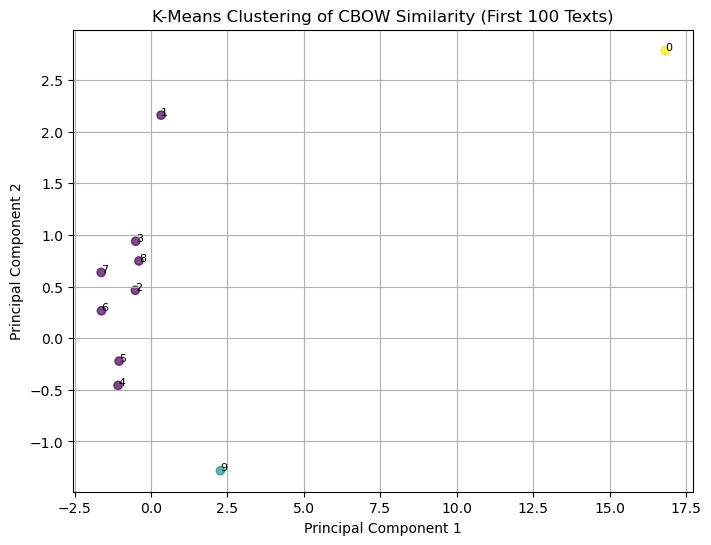

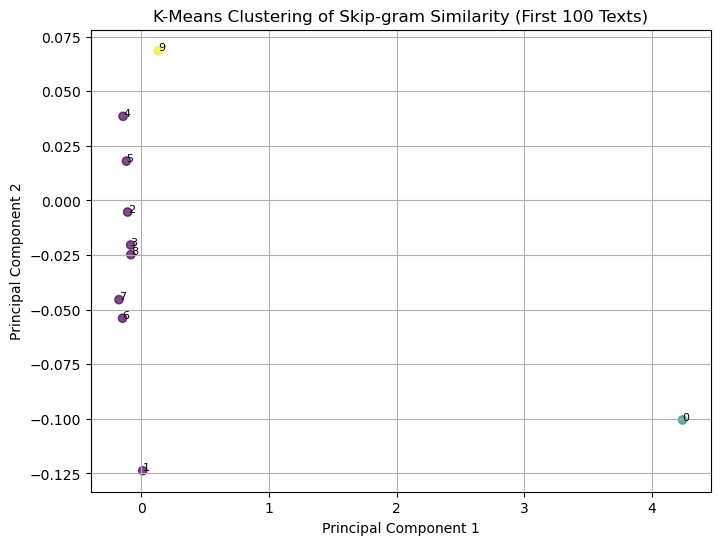

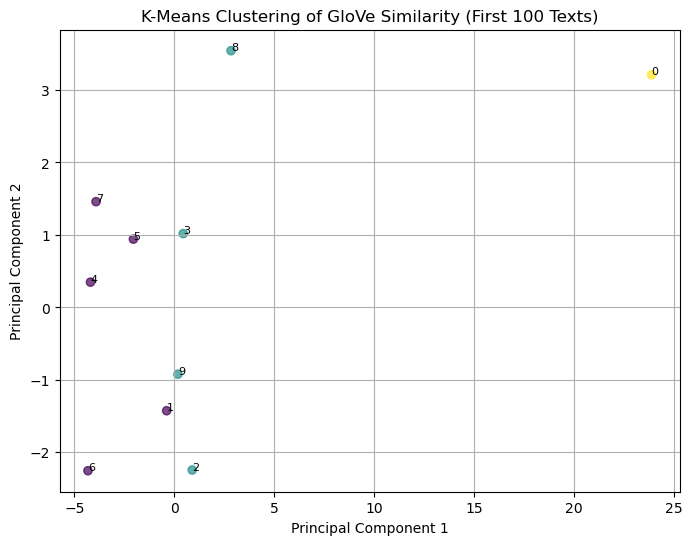

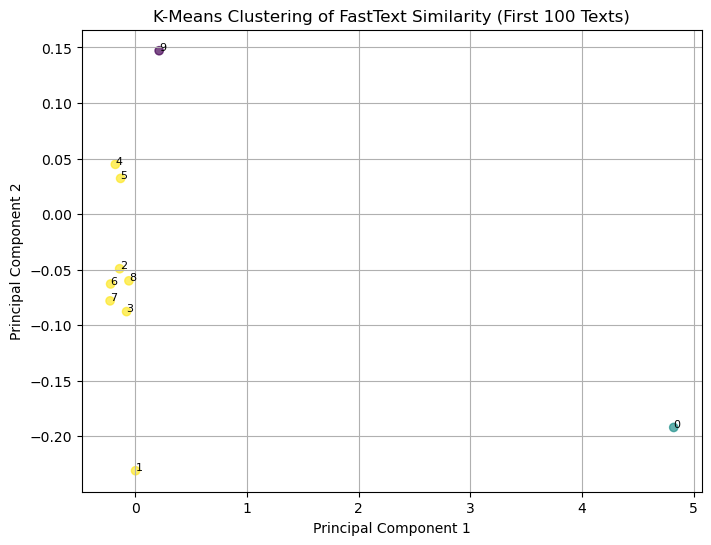

In [200]:
def plot_kmeans(similarity_matrix, method_name, n_clusters=3):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(similarity_matrix)
    labels = kmeans.labels_

    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(similarity_matrix)

    plt.figure(figsize=(8, 6))
    plt.scatter(reduced_data[:10, 0], reduced_data[:10, 1], c=labels[:10], alpha=0.7, cmap='viridis')
    plt.title(f'K-Means Clustering of {method_name} Similarity (First 100 Texts)')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')

    for i, txt in enumerate(range(10)):
        plt.annotate(txt, (reduced_data[i, 0], reduced_data[i, 1]), fontsize=8)

    plt.grid()
    plt.show()

plot_kmeans(CBOW_review_similarity[:100], "CBOW")
plot_kmeans(skipgram_review_similarity[:100], "Skip-gram")
plot_kmeans(glove_review_similarity[:100], "GloVe")
plot_kmeans(Fast_text_review_similarity[:100], "FastText")


- Each point in the scatter plot represents one of the first 100 texts from our dataset based on their cosine similarity derived from the CBOW model.
- The clustering indicates that most of the texts are grouped closely together in the lower part of the plot, which signifies that they are quite similar in terms of content or meaning.
- The yellow point (label 0) stands out from the rest, indicating that this particular text has a lower similarity to the others. It may represent a unique theme, topic, or style that differs significantly from the other texts in the group.

<h1 style="color: #FF6F61; text-align: center; font-weight: bold; background-color: #FFEBEE; padding: 20px; border-radius: 10px;">
  👀 Challenges encountred during this project 

<div style="background-color: #f5f5dc; padding: 10px; border-radius: 5px;">

- We faced a challenge in explaining the data features and deriving meaningful business insights from them. This required a deeper analysis and interpretation of the data.
- We encountered issues with texts containing contractions like "couldn't" or "can't" during the tokenization phase, which caused processing problems. To address this, we decided to expand contractions as a solution.
-  we faced time-consuming challenges with word embeddings like GloVe and FastText. To optimize performance, we implemented batching and a pipeline process, which significantly reduced the processing time.
- we struggled to determine whether to focus solely on the review text or include the summary as well. We resolved this by calculating the similarity between the review and the summary to decide what is the best decision.
    
- We struggled about thinking  how to improve our model , so as part of feature engineering, we added a sentiment analysis column to enhance the performance of our model in the next steps .</div>
